## Importing necessary libraries

In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
pd.options.display.max_columns = None
pd.set_option('display.max_colwidth', -1)

from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

#### Chart studio helps to embed interactive plotly graphs in platforms outside jupyter

In [285]:
import chart_studio
import chart_studio.plotly as py
import chart_studio.tools as tls

- Setting up the credentials from Plotly

In [286]:
tls.set_credentials_file(username='IshaGulati',api_key='Kk4iDM0uYjM8PuTV2I20')

#### Text preprocessing libraries

In [287]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords

from tqdm import tqdm
import os
import nltk
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch
import re
import string
import codecs
import unidecode


import warnings
warnings.filterwarnings("ignore")


### Function to generate random colours
#### Can be used by passing number of colours needed

In [288]:
def random_colours(number_of_colors):
    '''
    Simple function for random colours generation.
    Input:
        number_of_colors - integer value indicating the number of colours which are going to be generated.
    Output:
        Color in the following format: ['#E86DA4'] .
    '''
    colors = []
    for i in range(number_of_colors):
        colors.append("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
    return colors

In [289]:
train_data = pd.read_csv('../data/train.csv',encoding='utf-8')

In [290]:
test_data = pd.read_csv('../data/test.csv',encoding='utf-8')

In [291]:
test_data.shape

(1819, 2)

In [292]:
train_data.head()

tweet_id  \
0  1701       
1  1851       
2  2689       
3  4525       
4  3604       

                                                                                                                                             tweet  \
0  #sxswnui #sxsw #apple defining language of touch with different dialects becoming smaller                                                         
1  Learning ab Google doodles! All doodles should be light, funny &amp; innovative, with exceptions for significant occasions. #GoogleDoodle #sxsw   
2  one of the most in-your-face ex. of stealing the show in yrs RT @mention &quot;At #SXSW, Apple schools the mkt experts&quot;  {link}              
3  This iPhone #SXSW app would b pretty awesome if it didn't crash every 10mins during extended browsing. #Fuckit #Illmakeitwork                     
4  Line outside the Apple store in Austin waiting for the new iPad #SXSW  {link}                                                                     

   sentiment  
0  1          
1  1          
2  2          
3  0          
4  1

In [293]:
train_data.loc[0:15,'tweet']

0     #sxswnui #sxsw #apple defining language of touch with different dialects becoming smaller                                                      
1     Learning ab Google doodles! All doodles should be light, funny &amp; innovative, with exceptions for significant occasions. #GoogleDoodle #sxsw
2     one of the most in-your-face ex. of stealing the show in yrs RT @mention &quot;At #SXSW, Apple schools the mkt experts&quot;  {link}           
3     This iPhone #SXSW app would b pretty awesome if it didn't crash every 10mins during extended browsing. #Fuckit #Illmakeitwork                  
4     Line outside the Apple store in Austin waiting for the new iPad #SXSW  {link}                                                                  
5     #technews One lone dude awaits iPad 2 at AppleÛªs SXSW store {link} #Tech_News #Apple #iPad_2 #SXSW #tablets #tech                            
6     SXSW Tips, Prince, NPR Videos, Toy Shopping With Zuckerberg.\r\n{link}  #sxsw  #ipad          

In [294]:
train_data.shape

(7274, 3)

In [295]:
test_data.isnull().sum()

tweet_id    0
tweet       0
dtype: int64

In [296]:
train_data.isnull().sum()

tweet_id     0
tweet        1
sentiment    0
dtype: int64

- We will remove the only null row present

In [297]:
train_data[train_data.isnull().any(axis=1)]

tweet_id tweet  sentiment
1274  6         NaN   1

In [298]:
train_data.dropna(inplace=True)

In [299]:
train_data.shape

(7273, 3)

In [300]:
train_data.describe()

tweet_id    sentiment
count  7273.000000  7273.000000
mean   4532.359137  1.299189   
std    2617.500684  0.607861   
min    2.000000     0.000000   
25%    2263.000000  1.000000   
50%    4531.000000  1.000000   
75%    6797.000000  2.000000   
max    9092.000000  3.000000

## Adding Sentiment text for better visualizations
### We have done dictionary mapping to reflect the textual meaning of the sentiment classes
* 0: Negative
* 1: Neutral
* 2: Positive
* 3: Can't Tell

In [301]:
sentiment_dict = {0:'Negative',1:'Neutral',2:'Positive',3:"""Can't tell"""}
train_data['vis_sentiment'] = train_data['sentiment'].map(sentiment_dict)
train_data.head()

tweet_id  \
0  1701       
1  1851       
2  2689       
3  4525       
4  3604       

                                                                                                                                             tweet  \
0  #sxswnui #sxsw #apple defining language of touch with different dialects becoming smaller                                                         
1  Learning ab Google doodles! All doodles should be light, funny &amp; innovative, with exceptions for significant occasions. #GoogleDoodle #sxsw   
2  one of the most in-your-face ex. of stealing the show in yrs RT @mention &quot;At #SXSW, Apple schools the mkt experts&quot;  {link}              
3  This iPhone #SXSW app would b pretty awesome if it didn't crash every 10mins during extended browsing. #Fuckit #Illmakeitwork                     
4  Line outside the Apple store in Austin waiting for the new iPad #SXSW  {link}                                                                     

   sentiment vis_sentiment  
0  1          Neutral       
1  1          Neutral       
2  2          Positive      
3  0          Negative      
4  1          Neutral

In [302]:
temp_vis = train_data.groupby('vis_sentiment').count()['tweet'].reset_index().sort_values(by='tweet',ascending=False)
temp_vis.style.background_gradient(cmap='Blues')

### Univariate Analysis of the Sentiment Data

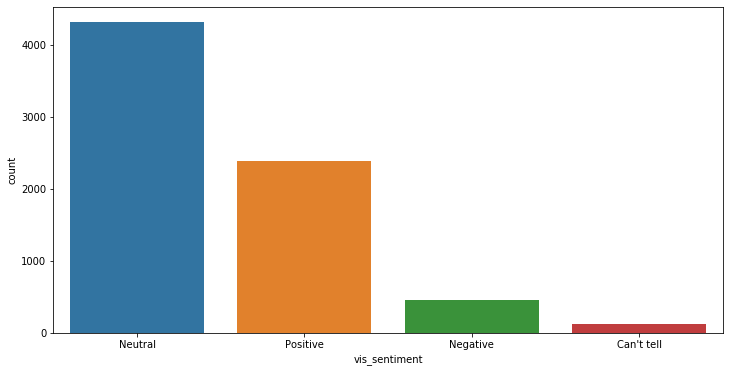

In [303]:
plt.figure(figsize=(12,6))
sns.countplot(x='vis_sentiment',data=train_data)

In [304]:
funnel = go.Figure(go.Funnelarea(
    text =temp_vis.vis_sentiment,
    values = temp_vis.tweet,
    title = {"position": "top center"}
    ))
funnel.show()

- We see that more than half of the tweets are classified as Neutral tweets
- Less than 10% of tweets are in the negative and can't tell categories

### Bivariate Analysis
- Character Counts for Positive and Negative tweets

In [305]:
py.plot(funnel, filename='Funnel chart',auto_open=False)

'https://plotly.com/~IshaGulati/97/'

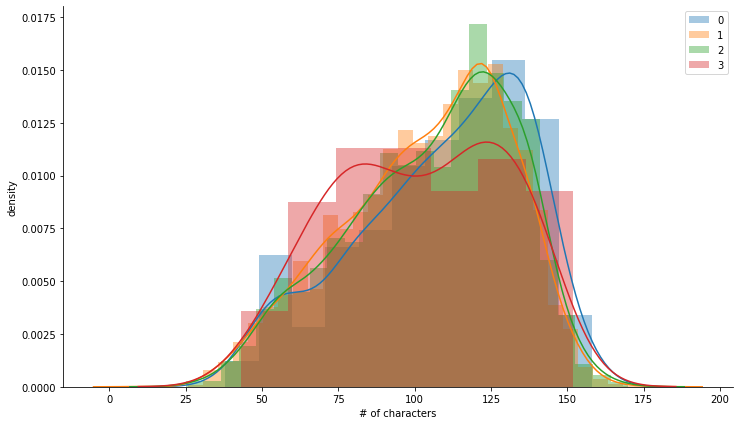

In [306]:
fig, ax = plt.subplots(figsize=(12,7))
for label, group in train_data.groupby('sentiment'):
    sns.distplot(group['tweet'].str.len(), label=str(label), ax=ax)
plt.xlabel('# of characters')
plt.ylabel('density')
plt.legend()
sns.despine()

In [307]:
train_data['tweet_len']= train_data['tweet'].apply(len)
data = [
    go.Box(
        y=train_data[train_data['sentiment']==0]['tweet_len'],
        name='Negative'
    ),
    go.Box(
        y=train_data[train_data['sentiment']==2]['tweet_len'],
        name='Positive'
    ),
    go.Box(
        y=train_data[train_data['sentiment']==1]['tweet_len'],
        name = 'Neutral')
]
layout = go.Layout(
    title = 'Comparison of character count in Tweets '
)
char_box = go.Figure(data=data, layout=layout)
char_box.show()

In [308]:
train_data['word_count']= train_data['tweet'].apply(lambda x: len(str(x).split()))

In [309]:
train_data.head()

tweet_id  \
0  1701       
1  1851       
2  2689       
3  4525       
4  3604       

                                                                                                                                             tweet  \
0  #sxswnui #sxsw #apple defining language of touch with different dialects becoming smaller                                                         
1  Learning ab Google doodles! All doodles should be light, funny &amp; innovative, with exceptions for significant occasions. #GoogleDoodle #sxsw   
2  one of the most in-your-face ex. of stealing the show in yrs RT @mention &quot;At #SXSW, Apple schools the mkt experts&quot;  {link}              
3  This iPhone #SXSW app would b pretty awesome if it didn't crash every 10mins during extended browsing. #Fuckit #Illmakeitwork                     
4  Line outside the Apple store in Austin waiting for the new iPad #SXSW  {link}                                                                     

   sentiment vis_sentiment  tweet_len  word_count  
0  1          Neutral       89         12          
1  1          Neutral       143        19          
2  2          Positive      132        22          
3  0          Negative      125        19          
4  1          Neutral       77         14

In [310]:
train_data['tweet_len']= train_data['tweet'].apply(len)
data = [
    go.Box(
        y=train_data[train_data['sentiment']==0]['word_count'],
        name='Negative'
    ),
    go.Box(
        y=train_data[train_data['sentiment']==2]['word_count'],
        name='Positive'
    ),
    go.Box(
        y=train_data[train_data['sentiment']==1]['word_count'],
        name = 'Neutral')
]
layout = go.Layout(
    title = 'Comparison of word count in Tweets '
)
word_count_box = go.Figure(data=data, layout=layout)
word_count_box.show()

In [311]:
py.plot(word_count_box, filename='Word_count_box',auto_open=False)

'https://plotly.com/~IshaGulati/6/'

### Twitter Character Count : 280 characters since 2017, earlier it was 140 characters 
##### FOR THIS PARTICULAR DATASET WE CONSIDER 140 CHARACTERS AS THE DATA HAS DATES FROM 2011.
What is Counted:

   - Any character in the text of your post, including spaces
   - Emojis (1 emoji registers as 2 characters)
   - Hashtags
   - Twitter handles (when mentioning an account)
   - Links*

What is not Counted:

   - Visual content (images, GIFs, and videos)
   - Polls
   - Quote Tweets
   - Twitter handles (only when you are replying to a Tweet)


# Cleaning the corpus

* *We see that there are common hastags such as #sxsw and #'?sxsw?' present in almost every tweet, we can remove them since they might not help us differentiate b/w sentiments*
* The user handles for all the tweets have been replaced by **@mention**
* The retweets are identified by character **RT**, hence these can be removed as well
* The url's in tweets have been replaced by **{link}** and so these can be removed
* Other cleaning steps involve removal of non aplhabets (digits, special symbols, punctuations


#### Post Note : though the cleaning helped us in getting more insights, the model was only well trained when all the twitter data was used in it's most raw form

In [312]:
train_data.loc[0:20,'tweet']

0     #sxswnui #sxsw #apple defining language of touch with different dialects becoming smaller                                                      
1     Learning ab Google doodles! All doodles should be light, funny &amp; innovative, with exceptions for significant occasions. #GoogleDoodle #sxsw
2     one of the most in-your-face ex. of stealing the show in yrs RT @mention &quot;At #SXSW, Apple schools the mkt experts&quot;  {link}           
3     This iPhone #SXSW app would b pretty awesome if it didn't crash every 10mins during extended browsing. #Fuckit #Illmakeitwork                  
4     Line outside the Apple store in Austin waiting for the new iPad #SXSW  {link}                                                                  
5     #technews One lone dude awaits iPad 2 at AppleÛªs SXSW store {link} #Tech_News #Apple #iPad_2 #SXSW #tablets #tech                            
6     SXSW Tips, Prince, NPR Videos, Toy Shopping With Zuckerberg.\r\n{link}  #sxsw  #ipad          

### BeautifulSoup - Decoding html to general text, will replace &amp and &quot to  & and " ", etc

In [313]:
from bs4 import BeautifulSoup
def remove_html_encodings(x):
    example1 = BeautifulSoup(x, 'lxml')
    return example1.get_text()

In [314]:
train_data["tweet"] = train_data["tweet"].apply(lambda x: remove_html_encodings(x))

In [315]:
train_data.head(20)

tweet_id  \
0   1701       
1   1851       
2   2689       
3   4525       
4   3604       
5   966        
6   1395       
7   8182       
8   8835       
9   883        
10  6398       
11  2369       
12  3944       
13  6909       
14  7917       
15  5849       
16  1955       
17  1472       
18  4730       
19  2166       

                                                                                                                                          tweet  \
0   #sxswnui #sxsw #apple defining language of touch with different dialects becoming smaller                                                     
1   Learning ab Google doodles! All doodles should be light, funny & innovative, with exceptions for significant occasions. #GoogleDoodle #sxsw   
2   one of the most in-your-face ex. of stealing the show in yrs RT @mention "At #SXSW, Apple schools the mkt experts"  {link}                    
3   This iPhone #SXSW app would b pretty awesome if it didn't crash every 10mins during extended browsing. #Fuckit #Illmakeitwork                 
4   Line outside the Apple store in Austin waiting for the new iPad #SXSW  {link}                                                                 
5   #technews One lone dude awaits iPad 2 at AppleÛªs SXSW store {link} #Tech_News #Apple #iPad_2 #SXSW #tablets #tech                           
6   SXSW Tips, Prince, NPR Videos, Toy Shopping With Zuckerberg.\r\n{link}  #sxsw  #ipad                                                          
7   NU user RT @mention New #UberSocial for #iPhone now in the App Store includes UberGuide to #SXSW sponsored by #Mashable                       
8   Free #SXSW sampler on iTunes {link} #FreeMusic                                                                                                
9   I think I might go all weekend without seeing the same iPad case twice... #sxsw                                                               
10  RT @mention Official #SXSW App Û÷SXSW GOÛª bit.ly/hmiiGa #android #iphone #ipad                                                             
11  It's official! I'm buying an iPad. #SXSW #elevate                                                                                             
12  They're giving away iPad 2's, x boxes and books at @mention #sxsw #techenvy                                                                   
13  RT @mention We're officially at #SXSW! Come by the @mention Grill, mention us w/ #zazzlsxsw and youÛªll get to make your own iPhone case!    
14  #Companies to watch, from the #SXSW trade show floor {link} #apps #features #hardware #ipad #iphone                                           
15  RT @mention Google Marissa Mayer, future of location: augmented reality, contextual discovery, make smartphones smarter. #sxsw                
16  DL the #Calyp App to get into #Calyp Casa at #SXSW the free mobile app is available in iTunes App Store & Android Market. See u there!        
17  Well yeah.  Music > iPhone nerds RT @mention my god, cute girls everywhere...I love when interactive ends and music begins #sxsw              
18  Apple Opens Pop Up Store at SXSW {link} via @mention #apple #iPad2 #technology #iTunes #SXSW                                                  
19  @mention atleast you are at #sxsw. I'm not there AND I have no Ipad. #doubleloser                                                             

    sentiment vis_sentiment  tweet_len  word_count  
0   1          Neutral       89         12          
1   1          Neutral       143        19          
2   2          Positive      132        22          
3   0          Negative      125        19          
4   1          Neutral       77         14          
5   1          Neutral       115        18          
6   1          Neutral       82         12          
7   1          Neutral       119        20          
8   2          Positive      46         7           
9   2          Positive      79         15       

In [316]:
test_data['tweet'] = test_data['tweet'].apply(lambda x: remove_html_encodings(x))

In [317]:
test_data.head()

tweet_id  \
0  7506       
1  7992       
2  247        
3  7688       
4  3294       

                                                                                                                                        tweet  
0  Audience Q: What prototyping tools do you use? Sketchbooks/sharpie pens, photoshop, Balsamic, Google docs, Axsure, etc. #myprototype #sxsw  
1  At SXSW? Send Your Best Photos & Videos to... {link} #citizen_journalism #cnn #ireport #photography #sxsw #Cyber #iPhone                    
2  @mention  and here's a pic of you winning your ipad! #unsix #sxsw cc @mention @mention  {link} (cont) {link}                                
3  Google Marissa Mayer: mobile phone as a cursor of physical location - new version of map fast and more real life like   #sxsw               
4  #SXSW Google maps is even cooler than I thought

#### Removing all hashtags with SXSW/sxsw in it, as they are common to all

In [318]:
train_data =  train_data[train_data['sentiment'] != 3]

In [319]:

train_data['tweet'] = train_data['tweet'].apply(lambda x:re.sub('[^\s]*sxsw[^\s]*','',x,flags=re.IGNORECASE))

# train_data['hashtags'] = train_data['tweet'].str.findall(r'#.*?(?=\s|$)') #finding and seperating all hashtags into a seperate column


In [320]:
train_data.head()

tweet_id  \
0  1701       
1  1851       
2  2689       
3  4525       
4  3604       

                                                                                                                                    tweet  \
0    #apple defining language of touch with different dialects becoming smaller                                                             
1  Learning ab Google doodles! All doodles should be light, funny & innovative, with exceptions for significant occasions. #GoogleDoodle    
2  one of the most in-your-face ex. of stealing the show in yrs RT @mention "At  Apple schools the mkt experts"  {link}                     
3  This iPhone  app would b pretty awesome if it didn't crash every 10mins during extended browsing. #Fuckit #Illmakeitwork                 
4  Line outside the Apple store in Austin waiting for the new iPad   {link}                                                                 

   sentiment vis_sentiment  tweet_len  word_count  
0  1          Neutral       89         12          
1  1          Neutral       143        19          
2  2          Positive      132        22          
3  0          Negative      125        19          
4  1          Neutral       77         14

In [321]:
test_data['tweet'] = test_data['tweet'].apply(lambda x:re.sub('[^\s]*sxsw[^\s]*','',x,flags=re.IGNORECASE))
test_data.head()

tweet_id  \
0  7506       
1  7992       
2  247        
3  7688       
4  3294       

                                                                                                                                   tweet  
0  Audience Q: What prototyping tools do you use? Sketchbooks/sharpie pens, photoshop, Balsamic, Google docs, Axsure, etc. #myprototype   
1  At  Send Your Best Photos & Videos to... {link} #citizen_journalism #cnn #ireport #photography  #Cyber #iPhone                         
2  @mention  and here's a pic of you winning your ipad! #unsix  cc @mention @mention  {link} (cont) {link}                                
3  Google Marissa Mayer: mobile phone as a cursor of physical location - new version of map fast and more real life like                  
4   Google maps is even cooler than I thought

### Extracting Hashtags
- Extracting all other hashtags for EDA, before we clean the data ahead

In [322]:
def hashtag_extract(x):
    hashtags = []
    x=x.str.lower()
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [323]:
positive_hashtags = hashtag_extract(train_data['tweet'][train_data['sentiment'] == 2])


negative_hashtags = hashtag_extract(train_data['tweet'][train_data['sentiment'] == 0])
neutral_hashtags = hashtag_extract(train_data['tweet'][train_data['sentiment'] == 1])
total_hashtags = hashtag_extract(train_data['tweet'])
# unnesting list
HT_positive = sum(positive_hashtags,[])
HT_negative = sum(negative_hashtags,[])
HT_neutral = sum(neutral_hashtags,[])
HT_total= sum(total_hashtags,[])

In [324]:
positive_hashtags

[[],
 ['freemusic'],
 [],
 ['elevate'],
 ['techenvy'],
 [],
 [],
 [],
 ['apple'],
 [],
 [],
 ['fb'],
 [],
 [],
 [],
 [],
 [],
 ['ipad'],
 [],
 ['tech', 'lightbox_photos', 'android', 'technology'],
 [],
 [],
 ['ipad2'],
 ['lovemusicapi'],
 [],
 [],
 [],
 ['tech'],
 [],
 [],
 ['apple'],
 [],
 [],
 [],
 [],
 [],
 ['sxflip'],
 ['gsdm'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['usguys'],
 ['apple'],
 [],
 [],
 ['seattle'],
 ['social'],
 ['apple'],
 ['bt', 'google'],
 ['google', 'circles', 'socbiz', 'fb'],
 [],
 [],
 [],
 [],
 [],
 ['augmentedreality'],
 ['minimalistprogramming', 'marissagoogle'],
 [],
 ['fxsw'],
 ['apple'],
 [],
 [],
 [],
 ['ipad'],
 ['ipad2'],
 [],
 [],
 [],
 [],
 ['discotalk', 'sloanxsw'],
 [],
 ['ipad2'],
 [],
 ['ipad'],
 ['japan'],
 [],
 [],
 ['ipad', 'ipad', 'art'],
 [],
 ['qagb'],
 ['ipad', 'apple'],
 [],
 [],
 [],
 [],
 ['winning', 'android', 'google'],
 ['apple'],
 [],
 [],
 ['ipad2', 'austin', 'apple'],
 [],
 [],
 [],
 [],
 ['theindustryparty', 'google', 'gs

In [325]:
a = nltk.FreqDist(HT_total)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 6) 
# plt.figure(figsize=(16,5))
# ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
# ax.set(ylabel = 'Count')
# plt.title('Count chart for All Hashtags')
# plt.show()
colors = ['#636efa','#ef553b','#00cc96','#ab63fa','#ffa15a','#19d3f3']
# colors[1] = 'crimson'

all_hashtags = go.Figure()
all_hashtags.add_trace(go.Bar(x=d.Hashtag,
    y=d.Count,
    name='All Hashtags',
    marker_color=colors
))
# all_hashtags = px.bar(d, x='Hashtag', y='Count',color ='Count')
# all_hashtags.show()

In [326]:
py.plot(all_hashtags, filename='All Hashtags',auto_open=False)

'https://plotly.com/~IshaGulati/78/'

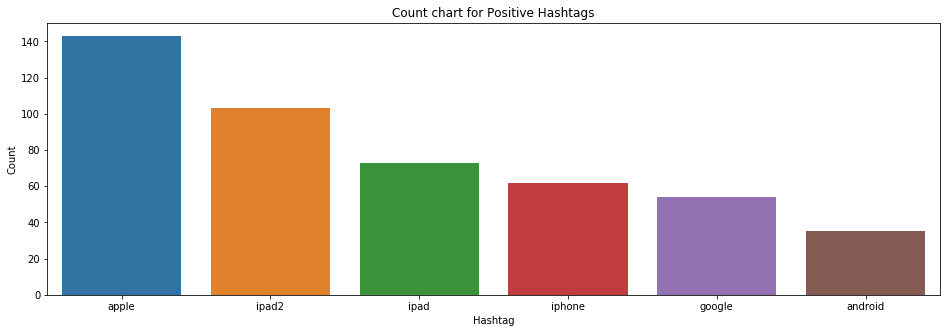

In [327]:
a = nltk.FreqDist(HT_positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 6) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.title('Count chart for Positive Hashtags')
plt.show()

In [328]:
colors = ['#636efa','#ef553b','#00cc96','#ab63fa','#ffa15a','#19d3f3']
# colors[1] = 'crimson'

positive_hashtags = go.Figure()
positive_hashtags.add_trace(go.Bar(x=d.Hashtag,
    y=d.Count,
    name='Positive Hashtags',
    marker_color=colors
))
positive_hashtags.update_layout(title_text='Positive Hashtags')

In [329]:
py.plot(positive_hashtags, filename='Positive Hashtags',auto_open=False)

'https://plotly.com/~IshaGulati/95/'

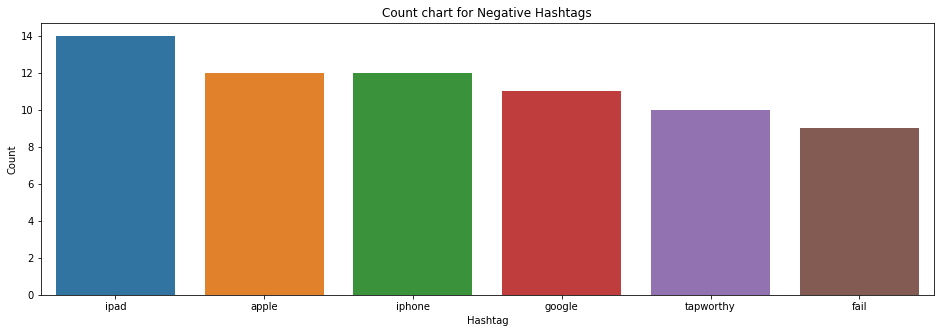

In [330]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 6) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.title('Count chart for Negative Hashtags')
plt.show()

In [331]:
colors = ['#636efa','#ef553b','#00cc96','#ab63fa','#ffa15a','#19d3f3']
# colors[1] = 'crimson'

negative_hashtags = go.Figure()
negative_hashtags.add_trace(go.Bar(x=d.Hashtag,
    y=d.Count,
    name='Negative Hashtags',
    marker_color=colors
))
negative_hashtags.update_layout(title_text='Negative Hashtags')

In [332]:
py.plot(negative_hashtags, filename='Negative Hashtags',auto_open=False)

'https://plotly.com/~IshaGulati/83/'

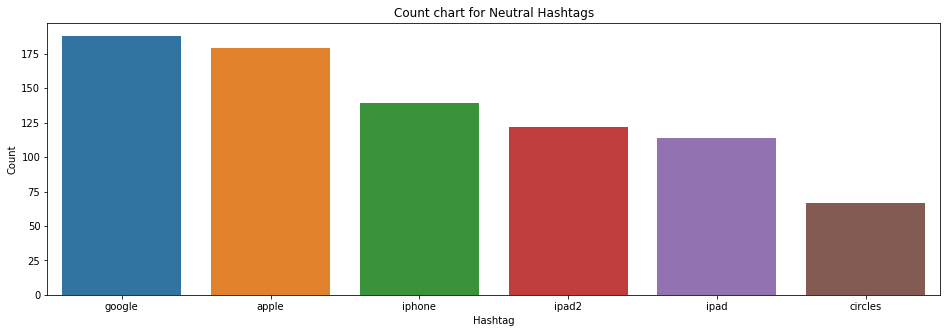

In [333]:
a = nltk.FreqDist(HT_neutral)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 6) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.title('Count chart for Neutral Hashtags')
plt.show()

In [334]:
colors = ['#636efa','#ef553b','#00cc96','#ab63fa','#ffa15a','#19d3f3']
# colors[1] = 'crimson'

neutral_hashtags = go.Figure()
neutral_hashtags.add_trace(go.Bar(x=d.Hashtag,
    y=d.Count,
    name='Neutral Hashtags',
    marker_color=colors
))
neutral_hashtags.update_layout(title_text='Neutral Hashtags')

In [335]:
py.plot(neutral_hashtags, filename='Neutral Hashtags',auto_open=False)

'https://plotly.com/~IshaGulati/87/'

In [336]:
# Creating a dictionary of contractions for contraction to expansion

contraction_mapping = {"aight" : "alright",
 "ain't": "am not",
 "amn't" : "am not",
 "aren't": "are not",
 "can't": "cannot",
 "'cause" : "because",
 "could've": "could have",
 "couldn't" : "could not",
 "couldn't've" : "could not have", 
 "daren't" : "dare not",
 "daresn't" : "dare not",
 "dasn't" : "dare not",
 "didn't" : "did not",
 "doesn't" : "does not",
 "don't" : "do not",
 "d'ye" : "do you",
 "e'er" : "ever",
 "everybody's" : "everybody is",
 "everyone's" : "everyone is",
 "finna":"fixing to",
 "g'day" : "good day",
 "gimme" : "give me",
 "giv'n": "given",
 "gonna":"going to",
 "gon't":"go not",
 "gotta":"got to",
 "hadn't":"had not",
 "had've":"had have",
 "hasn't":"has not",
 "haven't":"have not",
 "he'd":"he would",
 "he'dn't've'd":"he would not have had",
 "he'll":"he will",
 "he's":"he is",
 "he've":"he have",
 "how'd":"how did",
 "howdy":"how do you do",
 "how'll":"how will",
 "how're":"how are",
 "how's":"how has",
 "i'd": "i would",
 "i'd've":"i would have",
 "i'll": "i will",
 "i'm": "i am",
 "i'm'a": "i am about to",
 "i'm'o": "i am going to",
 "innit": "is it not",
 "i've": "i have",
 "isn't": "is not",
 "it'd": "it would",
 "it'll": "it will",
 "it's": "it is",
 "let's": "let us", 
 "ma'am": "madam",
 "mayn't": "may not",
 "may've": "may have",
 "methinks" : "me thinks",
 "mightn't": "might not",
 "might've": "might have",
 "mustn't": "must not",
 "mustn't've": "must not have",
 "must've": "must have",
 "needn't": "need not",
 "ne'er":"never",
 "o'clock": "of the clock",
 "o'er": "over",
 "ol'": "old",
 "oughtn't":"ought not",
 "'s": "is",
 "shalln't":"shall not",
 "shan't":"shall not",
 "she'd":"she would",
 "she'll":"she will",
 "she's":"she is",
 "should've":"should have",
 "shouldn't":"should not",
 "shouldn't've":"should not have",
 "somebody's":"somebody is",
 "someone's":"someone is",
 "something's":"something is",
 "so're":"so you are",
 "that'll":"that will",
 "that're":"that are",
 "that's":"that is",
 "that'd":"that had",
 "there'd":"there would",
 "there'll":"here shall",
 "there're":"there are",
 "there's":"there has",
 "these're":"these are",
 "these've":"these have",
 "they'd":"they would",
 "they'll":"they will",
 "they're":"they are",
 "they've":"they have",
 "this's":"this is",
 "those're":"those are",
 "those've":"those have",
 "'tis":"it is",
 "to've":"to have",
 "'twas":"it was",
 "wanna":"want to",
 "wasn't":"was not",
 "we'd":"we would",
 "we'd've":"we would have",
 "we'll":"we will",
 "we're":"we are",
 "we've":"we have",
 "weren't":"were not",
 "what'd":"what did",
 "what'll":"what will",
 "what're":"what are",
 "what's":"what is",
 "what've":"what have",
 "when's":"when is",
 "where'd":"where did",
 "where'll":"where will",
 "where're":"where are",
 "where's":"where has",
 "where've":"where have",
 "which'd":"which had",
 "which'll":"which shall",
 "which're":"which are",
 "which's":"which has",
 "which've":"which have",
 "who'd":"who would",
 "who'd've":"who would have",
 "who'll":"who will",
 "who're":"who are",
 "who's":"who has",
 "who've":"who have",
 "why'd":"why did",
 "why're":"why are",
 "why's":"why is",
 "won't":"will not",
 "would've":"would have",
 "wouldn't":"would not",
 "wouldn't've":"would not have",
 "y'all":"you all",
 "y'all'd've":"you all would have",
 "y'all'dn't've'd":"you all would not have had",
 "y'all're":"you all are",
 "you'd":"you would",
 "you'll":"you will",
 "you're":"you are",
 "you've":"you have",
  " u " : " you",
 " ur " : " your",
 " n ": " and ",
 " w/ " : " with ",
 " apples ": " apple is "}

In [337]:
def clean_text(text):
    try:
        decoded = unidecode.unidecode(codecs.decode(text, 'unicode_escape'))
    except:
        decoded = unidecode.unidecode(text)
#     print(text)
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = re.sub("’", "'", decoded)
    text = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in text.split(" ")])
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text) #""" removes any words in square brackets"""
    text = re.sub('{link}', '', text) #"""removes {link} from text """
    text = re.sub('@mention','',text) #removes user handles
    text = re.sub('rt','',text) #removes RT as string
    text = re.sub('<.*?>+', '', text) #"""removes any words in <___> """
#     text = re.sub('[^\s]*sxsw[^\s]*','',text) #removes all strings with sxsw
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) #"""removes punctuations """
    
    text = re.sub('\n', '', text) #removes line breaks
    text = re.sub('\w*\d\w*', '', text) #removes words with digits
#     text = re.sub('[0-9a-zA-Z]*[^\s0-9a-zA-Z]+[0-9a-zA-Z]*','',text)
    text = re.sub(r'(.)\1+', r'\1\1', text) #spell_corrected
    text = text.replace('\r','')
    return text

In [338]:
train_data['cleaned_text'] = train_data['tweet'].apply(lambda x:clean_text(x))
train_data['cleaned_text'] = train_data['cleaned_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
train_data.loc[0:20,'cleaned_text']

0     apple defining language touch with different dialects becoming smaller                                                  
1     learning google doodles all doodles should light funny innovative with exceptions for significant occasions googledoodle
2     one the most inyourface stealing the show yrs apple schools the mkt expes                                               
3     this iphone app would pretty awesome did not crash every during extended browsing fuckit illmakeitwork                  
4     line outside the apple store austin waiting for the new ipad                                                            
5     technews one lone dude awaits ipad appleaas store technews apple tablets tech                                           
6     tips prince npr videos toy shopping with zuckerberg ipad                                                                
7     user new ubersocial for iphone now the app store includes uberguide sponsored mashable                   

In [339]:
test_data['cleaned_text'] = test_data['tweet'].apply(lambda x:clean_text(x))
test_data['cleaned_text'] = test_data['cleaned_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
test_data.loc[0:20,'cleaned_text']

0     audience what prototyping tools you use sketchbookssharpie pens photoshop balsamic google docs axsure etc myprototype
1     send your best photos videos citizenjournalism cnn irepo photography cyber iphone                                    
2     and heres pic you winning your ipad unsix cont                                                                       
3     google marissa mayer mobile phone cursor physical location new version map fast and more real life like              
4     google maps even cooler than thought                                                                                 
5     front popup store last night                                                                                         
6     next life coming back ipad women cannot keep their hands off this thing                                              
7     google celebrating day style                                                                                         
8     hm

In [340]:
#Applying NER after first level of cleaning

import spacy
from spacy.pipeline import EntityRuler
nlp = spacy.load("en_core_web_sm")
ruler = EntityRuler(nlp)

pattern = [{"label":"ORG", "pattern": "apple"},
           {"label":"ORG", "pattern": "google"},
           {"label":"ORG", "pattern": "facebook"},
           {"label":"ORG", "pattern": "amazon"},
           {"label":"ORG", "pattern": "microsoft"}]

ruler.add_patterns(pattern)
nlp.add_pipe(ruler)

import spacy
from spacy import displacy
nlp = spacy.load("en")

def ner(text):
  doc = nlp(text)
  return doc.ents

train_data["named_entity_1"] = train_data["tweet"].apply(lambda x : ([(word.text, word.label_) for word in ner(x)]))

In [341]:
train_data.head(20)

tweet_id  \
0   1701       
1   1851       
2   2689       
3   4525       
4   3604       
5   966        
6   1395       
7   8182       
8   8835       
9   883        
11  2369       
12  3944       
13  6909       
14  7917       
15  5849       
16  1955       
17  1472       
18  4730       
19  2166       
20  3497       

                                                                                                                                     tweet  \
0     #apple defining language of touch with different dialects becoming smaller                                                             
1   Learning ab Google doodles! All doodles should be light, funny & innovative, with exceptions for significant occasions. #GoogleDoodle    
2   one of the most in-your-face ex. of stealing the show in yrs RT @mention "At  Apple schools the mkt experts"  {link}                     
3   This iPhone  app would b pretty awesome if it didn't crash every 10mins during extended browsing. #Fuckit #Illmakeitwork                 
4   Line outside the Apple store in Austin waiting for the new iPad   {link}                                                                 
5   #technews One lone dude awaits iPad 2 at AppleÛªs  store {link} #Tech_News #Apple #iPad_2  #tablets #tech                               
6    Tips, Prince, NPR Videos, Toy Shopping With Zuckerberg.\r\n{link}    #ipad                                                              
7   NU user RT @mention New #UberSocial for #iPhone now in the App Store includes UberGuide to  sponsored by #Mashable                       
8   Free  sampler on iTunes {link} #FreeMusic                                                                                                
9   I think I might go all weekend without seeing the same iPad case twice...                                                                
11  It's official! I'm buying an iPad.  #elevate                                                                                             
12  They're giving away iPad 2's, x boxes and books at @mention  #techenvy                                                                   
13  RT @mention We're officially at  Come by the @mention Grill, mention us w/  and youÛªll get to make your own iPhone case!               
14  #Companies to watch, from the  trade show floor {link} #apps #features #hardware #ipad #iphone                                           
15  RT @mention Google Marissa Mayer, future of location: augmented reality, contextual discovery, make smartphones smarter.                 
16  DL the #Calyp App to get into #Calyp Casa at  the free mobile app is available in iTunes App Store & Android Market. See u there!        
17  Well yeah.  Music > iPhone nerds RT @mention my god, cute girls everywhere...I love when interactive ends and music begins               
18  Apple Opens Pop Up Store at  {link} via @mention #apple #iPad2 #technology #iTunes                                                       
19  @mention atleast you are at  I'm not there AND I have no Ipad. #doubleloser                                                              
20  Cue the choir music   @mention Apple Store,  {link}                                                                                      

    sentiment vis_sentiment  tweet_len  word_count  \
0   1          Neutral       89         12           
1   1          Neutral       143        19           
2   2          Positive      132        22           
3   0          Negative      125        19           
4   1          Neutral       77         14           
5   1          Neutral       115        18           
6   1          Neutral       82         12           
7   1          Neutral       119        20           
8   2          Positive      46         7            
9   2          Positive      79         15           
11  2          Positive      49         8            
12  2          Positive      75     

In [342]:
train_data["organizations"] = train_data["tweet"].apply(lambda x : ([(word.text) for word in ner(x) if word.label_ == "ORG"]))

In [343]:
import operator
dict_org = {}
def create_set(x):
    for i in x:
        if i in dict_org:
            dict_org[i] += 1
        else:
            dict_org[i] = 1
    
train_data["organizations"].apply(lambda x:create_set(x))
sorted(dict_org.items(), key=lambda x: x[1], reverse=True)

[('Apple', 984),
 ('Google', 664),
 ('iPhone', 591),
 ('Circles', 283),
 ('Android', 112),
 ('Launch Major New Social Network', 107),
 ('iPads', 54),
 ('UberGuide', 52),
 ('Google Circles', 38),
 ('Congress', 28),
 ('RT @mention Google', 27),
 ('CNN', 27),
 ('Google Maps', 26),
 ('google', 22),
 ('Microsoft', 22),
 ('iPhone, BlackBerry & Android', 20),
 ('Apple Store', 18),
 ('@mention & @mention', 17),
 ('apple', 15),
 ('Foursquare', 15),
 ('NFC', 14),
 ('SEO', 13),
 ('AT&T', 12),
 ('@mention', 12),
 ('TX', 11),
 ('Google TV', 11),
 ('6th & Congress', 11),
 ('congress', 11),
 ('Gowalla', 11),
 ('the Team Android Choice Awards', 11),
 ("Maggie Mae's", 10),
 ('LaunchRock', 9),
 ('Facebook', 9),
 ('ACLU', 9),
 ('Andoid', 9),
 ('webdoc.com', 8),
 ('Google Analytics', 8),
 ('Blogger', 8),
 ("@mention & Bing's", 8),
 ('IPhone', 8),
 ('Congrats', 8),
 ('Red Cross', 8),
 ('HootSuite Mobile', 7),
 ('Time', 7),
 ('App Store', 7),
 ('Google party', 7),
 ('Hilton', 7),
 ('Droid', 6),
 ('BlackBerr

In [344]:
orgs = {'org_apple':['apple','iphone','ipads','ipad','iphones','itunes','ipad2','ios','mac','macos','macbook','ipod'],
        'org_google':['google','android','andoid','nexus'],
        'org_uber':['uber','uberguide'],
        'org_microsoft':['microsoft','bing','windows'],
         'org_facebook':['facebook']}

In [345]:
for key in orgs:
    train_data[key] = 0
train_data.head()
# train_data.drop(['Apple','Google','Uber','Microsoft','Facebook'],axis=1,inplace=True)

tweet_id  \
0  1701       
1  1851       
2  2689       
3  4525       
4  3604       

                                                                                                                                    tweet  \
0    #apple defining language of touch with different dialects becoming smaller                                                             
1  Learning ab Google doodles! All doodles should be light, funny & innovative, with exceptions for significant occasions. #GoogleDoodle    
2  one of the most in-your-face ex. of stealing the show in yrs RT @mention "At  Apple schools the mkt experts"  {link}                     
3  This iPhone  app would b pretty awesome if it didn't crash every 10mins during extended browsing. #Fuckit #Illmakeitwork                 
4  Line outside the Apple store in Austin waiting for the new iPad   {link}                                                                 

   sentiment vis_sentiment  tweet_len  word_count  \
0  1          Neutral       89         12           
1  1          Neutral       143        19           
2  2          Positive      132        22           
3  0          Negative      125        19           
4  1          Neutral       77         14           

                                                                                                               cleaned_text  \
0  apple defining language touch with different dialects becoming smaller                                                     
1  learning google doodles all doodles should light funny innovative with exceptions for significant occasions googledoodle   
2  one the most inyourface stealing the show yrs apple schools the mkt expes                                                  
3  this iphone app would pretty awesome did not crash every during extended browsing fuckit illmakeitwork                     
4  line outside the apple store austin waiting for the new ipad                                                               

                                named_entity_1 organizations  org_apple  \
0  []                                           []            0           
1  []                                           []            0           
2  [(one, CARDINAL), (Apple, ORG), (mkt, ORG)]  [Apple, mkt]  0           
3  [(iPhone, EVENT), (Illmakeitwork, PERSON)]   []            0           
4  [(Apple, ORG), (Austin, GPE)]                [Apple]       0           

   org_google  org_uber  org_microsoft  org_facebook  
0  0           0         0              0             
1  0           0         0              0             
2  0           0         0              0             
3  0           0         0              0             
4  0           0         0              0

In [346]:
train_data.loc[0,'tweet']

'  #apple defining language of touch with different dialects becoming smaller'

In [347]:
for index,row in train_data.iterrows():
    for word in row['cleaned_text'].split():        
        for key in orgs:             
            if word in orgs[key]:
                train_data.loc[index,key] = 1
train_data

tweet_id  \
0     1701       
1     1851       
2     2689       
3     4525       
4     3604       
...    ...       
7269  3343       
7270  5334       
7271  5378       
7272  2173       
7273  3162       

                                                                                                                                       tweet  \
0       #apple defining language of touch with different dialects becoming smaller                                                             
1     Learning ab Google doodles! All doodles should be light, funny & innovative, with exceptions for significant occasions. #GoogleDoodle    
2     one of the most in-your-face ex. of stealing the show in yrs RT @mention "At  Apple schools the mkt experts"  {link}                     
3     This iPhone  app would b pretty awesome if it didn't crash every 10mins during extended browsing. #Fuckit #Illmakeitwork                 
4     Line outside the Apple store in Austin waiting for the new iPad   {link}                                                                 
...                                                                        ...                                                                 
7269  @mention Google plze Tammi.  I'm in middle of  craziness and everything is soooooo busy!                                                 
7270  RT @mention ÷¼ Are you all set? ÷_ {link} ÷_ #edchat #musedchat   #newTwitter                                                         
7271  RT @mention Aha! Found proof of lactation room, excuse me, "Mother's Room," brought to you by Google, at last year's  {link}             
7272  We just launched our iPad app at  Get all the details + the first edition FREE: {link}                                                   
7273  The next fin serv battle is vs Apple, GOOG, Mobile operators. They have consumer loyalty and tons of cash (vs. Banks) #bankinnovate      

      sentiment vis_sentiment  tweet_len  word_count  \
0     1          Neutral       89         12           
1     1          Neutral       143        19           
2     2          Positive      132        22           
3     0          Negative      125        19           
4     1          Neutral       77         14           
...  ..              ...       ..         ..           
7269  1          Neutral       93         15           
7270  1          Neutral       91         15           
7271  1          Neutral       140        22           
7272  1          Neutral       92         18           
7273  1          Neutral       137        23           

                                                                                                                  cleaned_text  \
0     apple defining language touch with different dialects becoming smaller                                                     
1     learning google doodles all doodles should light funny innovative with exceptions for significant occasions googledoodle   
2     one the most inyourface stealing the show yrs apple schools the mkt expes                                                  
3     this iphone app would pretty awesome did not crash every during extended browsing fuckit illmakeitwork                     
4     line outside the apple store austin waiting for the new ipad                                                               
...                                                            ...                                                               
7269  google plze tammi middle craziness and everything soo busy                                                                 
7270  are you all set edchat musedchat newtwitter                                                                                
7271  aha found proof lactation room excuse mothers room brought you google last years                                           
7272  just launched our ipad app get all the details the first edition free            

In [348]:
train_data["location"] = train_data["tweet"].apply(lambda x : ([(word.text) for word in ner(x) if word.label_ == "GPE"]))

In [349]:
train_data["person"] = train_data["tweet"].apply(lambda x : ([(word.text) for word in ner(x) if word.label_ == "PERSON"]))

In [350]:
train_data.head()

tweet_id  \
0  1701       
1  1851       
2  2689       
3  4525       
4  3604       

                                                                                                                                    tweet  \
0    #apple defining language of touch with different dialects becoming smaller                                                             
1  Learning ab Google doodles! All doodles should be light, funny & innovative, with exceptions for significant occasions. #GoogleDoodle    
2  one of the most in-your-face ex. of stealing the show in yrs RT @mention "At  Apple schools the mkt experts"  {link}                     
3  This iPhone  app would b pretty awesome if it didn't crash every 10mins during extended browsing. #Fuckit #Illmakeitwork                 
4  Line outside the Apple store in Austin waiting for the new iPad   {link}                                                                 

   sentiment vis_sentiment  tweet_len  word_count  \
0  1          Neutral       89         12           
1  1          Neutral       143        19           
2  2          Positive      132        22           
3  0          Negative      125        19           
4  1          Neutral       77         14           

                                                                                                               cleaned_text  \
0  apple defining language touch with different dialects becoming smaller                                                     
1  learning google doodles all doodles should light funny innovative with exceptions for significant occasions googledoodle   
2  one the most inyourface stealing the show yrs apple schools the mkt expes                                                  
3  this iphone app would pretty awesome did not crash every during extended browsing fuckit illmakeitwork                     
4  line outside the apple store austin waiting for the new ipad                                                               

                                named_entity_1 organizations  org_apple  \
0  []                                           []            1           
1  []                                           []            0           
2  [(one, CARDINAL), (Apple, ORG), (mkt, ORG)]  [Apple, mkt]  1           
3  [(iPhone, EVENT), (Illmakeitwork, PERSON)]   []            1           
4  [(Apple, ORG), (Austin, GPE)]                [Apple]       1           

   org_google  org_uber  org_microsoft  org_facebook  location  \
0  0           0         0              0             []         
1  1           0         0              0             []         
2  0           0         0              0             []         
3  0           0         0              0             []         
4  0           0         0              0             [Austin]   

            person  
0  []               
1  []               
2  []               
3  [Illmakeitwork]  
4  []

In [351]:
# import nltk
# nltk.download('averaged_perceptron_tagger')

In [352]:

dict_location = {}
def create_location_set(x):
    for i in x:
        if i in dict_location:
            dict_location[i] += 1
        else:
            dict_location[i] = 1
    
train_data["location"].apply(lambda x:create_location_set(x))
sorted(dict_location.items(), key=lambda x: x[1], reverse=True)

[('Austin', 279),
 ('Japan', 69),
 ('Texas', 28),
 ('japan', 17),
 ('America', 12),
 ('US', 9),
 ('Mobile', 8),
 ('Cisco', 6),
 ('austin', 6),
 ('Canada', 5),
 ('Lightbox', 4),
 ('California', 4),
 ('Fado', 4),
 ('Android Market', 4),
 ('libya', 3),
 ('Blackberry', 3),
 ('iTunes', 3),
 ('EA Games', 3),
 ('Zynga', 3),
 ('Louisiana', 3),
 ('Scarborough', 3),
 ('Safari', 3),
 ('the United States', 3),
 ('Big Boi', 3),
 ('Yobongo', 3),
 ('Netflix', 3),
 ('Quotables', 2),
 ('SF', 2),
 ('West Sixth', 2),
 ('Join', 2),
 ('New Relic', 2),
 ('JS', 2),
 ('Skyfire', 2),
 ('Coyne', 2),
 ('texas', 2),
 ('Kenny', 2),
 ('Houston', 2),
 ('Hollywood', 2),
 ('Pac', 2),
 ('Nokia', 2),
 ('Qrank', 2),
 ('@mention \r\n ', 2),
 ('Brazil', 2),
 ('california', 2),
 ('San Antonio', 2),
 ('PS3', 2),
 ('Wii', 2),
 ('Bummed', 1),
 ('Congo', 1),
 ('Turkey Bowl', 1),
 ('Brooklyn', 1),
 ('Kinda', 1),
 ('Hilton', 1),
 ('blackberry', 1),
 ('Google Zeitgeist', 1),
 ('rww.to', 1),
 ('Bing', 1),
 ('Soooo', 1),
 ('Temporar

In [353]:

dict_person = {}
def create_person_set(x):
    for i in x:
        if i in dict_person:
            dict_person[i] += 1
        else:
            dict_person[i] = 1
    
train_data["person"].apply(lambda x:create_person_set(x))
sorted(dict_person.items(), key=lambda x: x[1], reverse=True)

[('Austin', 298),
 ('Apple', 137),
 ('Marissa Mayer', 111),
 ('iPad2', 91),
 ('Android', 73),
 ('Google', 66),
 ('iPhone', 30),
 ('Circles', 25),
 ('Flipboard', 18),
 ('Bing', 18),
 ('Austin Apple', 18),
 ('App', 15),
 ('Google Maps', 15),
 ('austin', 15),
 ('Mayer', 14),
 ('Barry Diller', 13),
 ('Google Circles', 13),
 ('Mark Belinsky', 13),
 ('Gram', 13),
 ('Twitter', 12),
 ('iTunes', 12),
 ('Mac', 12),
 ('MarissaGoogle', 11),
 ('Apple Store', 11),
 ('RT @mention Google', 10),
 ('Gowalla', 10),
 ('popup', 9),
 ('Discovr', 9),
 ('Android App', 9),
 ('RT', 9),
 ('qagb', 9),
 ('Austin Details', 8),
 ('Blackberry', 8),
 ('Charles Chen', 8),
 ('Geekfest', 7),
 ('iPhone App', 7),
 ('HP', 7),
 ('Lustre Pearl', 7),
 ('Google Hotpot', 7),
 ('BBQ', 7),
 ('apple', 7),
 ('Guy Kawasaki', 7),
 ('Guy', 7),
 ('Dude', 6),
 ('RT @mention Apple', 6),
 ('Buzz', 6),
 ("Marissa Mayer's", 6),
 ('UberSocial', 6),
 ('Aron Pilhofer', 6),
 ('Austin iPhone', 6),
 ('Steve Jobs', 6),
 ('Mike Tyson', 6),
 ('you\x8

In [354]:
total=[]
positive=[]
negative=[]
neutral=[]
for key in orgs:
    count_total = train_data[train_data[key]==1][key].sum()
    count_positive = train_data[(train_data[key]==1) & (train_data['sentiment']==2)][key].sum()
    count_negative = train_data[(train_data[key]==1) & (train_data['sentiment']==0)][key].sum()
    count_neutral = train_data[(train_data[key]==1) & (train_data['sentiment']==1)][key].sum()
    total.append(count_total)
    positive.append(count_positive)
    negative.append(count_negative)
    neutral.append(count_neutral)
x = ['Apple','Google','Uber','Microsoft','Facebook']
plot_org_data = pd.DataFrame(list(zip(x, total,positive,negative,neutral)),columns=['Organisation','Tweet_Count','Positive_Count','Negative_Count','Neutral_Count'])
    

In [355]:
plot_org_data = plot_org_data.sort_values(by='Tweet_Count',ascending=False).reset_index()

In [356]:
plot_org_data.drop('index',axis=1,inplace=True)

In [357]:
plot_org_data

Organisation  Tweet_Count  Positive_Count  Negative_Count  Neutral_Count
0  Apple        4256         1667            323             2266         
1  Google       2160         635             121             1404         
2  Microsoft    92           21              10              61           
3  Facebook     70           7               5               58           
4  Uber         59           17              2               40

In [358]:
tweet_by_org = go.Figure(data=[
    go.Bar(x=plot_org_data['Organisation'], y=plot_org_data['Tweet_Count'],),
])
# Change the bar mode
tweet_by_org.update_layout(barmode='group')
tweet_by_org.show()

In [359]:
py.plot(tweet_by_org, filename='Organisation_tweet_count',auto_open=False)

'https://plotly.com/~IshaGulati/8/'

In [360]:
plot_org_data_t = plot_org_data.transpose()

In [361]:
plot_org_data_t.columns = plot_org_data_t.iloc[0]

In [362]:
plot_org_data_t = plot_org_data_t.iloc[1:]

In [363]:
plot_org_data_t.index

Index(['Tweet_Count', 'Positive_Count', 'Negative_Count', 'Neutral_Count'], dtype='object')

In [364]:
plot_org_data_t = plot_org_data_t.iloc[1:]

In [365]:
tweet_by_sent_org = go.Figure(data=[
    go.Bar(name='Neutral', x=plot_org_data['Organisation'], y=plot_org_data['Neutral_Count']),
    go.Bar(name='Positive', x=plot_org_data['Organisation'], y=plot_org_data['Positive_Count']),
    go.Bar(name='Negative', x=plot_org_data['Organisation'], y=plot_org_data['Negative_Count'])
])
# Change the bar mode
tweet_by_sent_org.update_layout(barmode='group')
tweet_by_sent_org.show()

In [366]:
py.plot(tweet_by_sent_org, filename='Organisation wise Sentiment Count',auto_open=False)

'https://plotly.com/~IshaGulati/10/'

In [367]:
apple_pie = px.pie(plot_org_data_t, values='Apple', names=plot_org_data_t.index, title='Apple')
apple_pie.show()

In [368]:
py.plot(apple_pie, filename='Sentiment Distribution for Apple',auto_open=False)

'https://plotly.com/~IshaGulati/60/'

In [369]:
google_pie = px.pie(plot_org_data_t, values='Google', names=plot_org_data_t.index, title='Google')
google_pie.show()

In [370]:
py.plot(google_pie, filename='Sentiment Distribution for Google',auto_open=False)

'https://plotly.com/~IshaGulati/62/'

In [371]:
microsoft_pie = px.pie(plot_org_data_t, values='Microsoft', names=plot_org_data_t.index, title='Microsoft')
microsoft_pie.show()

In [372]:
py.plot(microsoft_pie, filename='Sentiment Distribution for Microsoft',auto_open=False)

'https://plotly.com/~IshaGulati/64/'

In [373]:
uber_pie = px.pie(plot_org_data_t, values='Uber', names=plot_org_data_t.index, title='Uber')
uber_pie.show()

In [374]:
py.plot(uber_pie, filename='Sentiment Distribution for Uber',auto_open=False)

'https://plotly.com/~IshaGulati/67/'

In [375]:
facebook_pie = px.pie(plot_org_data_t, values='Facebook', names=plot_org_data_t.index, title='Facebook')
facebook_pie.show()

In [376]:
py.plot(facebook_pie, filename='Sentiment Distribution for Facebook',auto_open=False)

'https://plotly.com/~IshaGulati/74/'

In [377]:
train_data['temp_list'] = train_data['cleaned_text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in train_data['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

In [378]:
def remove_stopword(x):
    stopwords = set(STOPWORDS)
    more_stopwords = {'amp', "quot","via","will"}
    stopwords = stopwords.union(more_stopwords)
    return [y for y in x if y not in stopwords]
train_data['temp_list'] = train_data['temp_list'].apply(lambda x:remove_stopword(x))

In [379]:
train_data.head()

tweet_id  \
0  1701       
1  1851       
2  2689       
3  4525       
4  3604       

                                                                                                                                    tweet  \
0    #apple defining language of touch with different dialects becoming smaller                                                             
1  Learning ab Google doodles! All doodles should be light, funny & innovative, with exceptions for significant occasions. #GoogleDoodle    
2  one of the most in-your-face ex. of stealing the show in yrs RT @mention "At  Apple schools the mkt experts"  {link}                     
3  This iPhone  app would b pretty awesome if it didn't crash every 10mins during extended browsing. #Fuckit #Illmakeitwork                 
4  Line outside the Apple store in Austin waiting for the new iPad   {link}                                                                 

   sentiment vis_sentiment  tweet_len  word_count  \
0  1          Neutral       89         12           
1  1          Neutral       143        19           
2  2          Positive      132        22           
3  0          Negative      125        19           
4  1          Neutral       77         14           

                                                                                                               cleaned_text  \
0  apple defining language touch with different dialects becoming smaller                                                     
1  learning google doodles all doodles should light funny innovative with exceptions for significant occasions googledoodle   
2  one the most inyourface stealing the show yrs apple schools the mkt expes                                                  
3  this iphone app would pretty awesome did not crash every during extended browsing fuckit illmakeitwork                     
4  line outside the apple store austin waiting for the new ipad                                                               

                                named_entity_1 organizations  org_apple  \
0  []                                           []            1           
1  []                                           []            0           
2  [(one, CARDINAL), (Apple, ORG), (mkt, ORG)]  [Apple, mkt]  1           
3  [(iPhone, EVENT), (Illmakeitwork, PERSON)]   []            1           
4  [(Apple, ORG), (Austin, GPE)]                [Apple]       1           

   org_google  org_uber  org_microsoft  org_facebook  location  \
0  0           0         0              0             []         
1  1           0         0              0             []         
2  0           0         0              0             []         
3  0           0         0              0             []         
4  0           0         0              0             [Austin]   

            person  \
0  []                
1  []                
2  []                
3  [Illmakeitwork]   
4  []                

                                                                                                          temp_list  
0  [apple, defining, language, touch, different, dialects, becoming, smaller]                                        
1  [learning, google, doodles, doodles, light, funny, innovative, exceptions, significant, occasions, googledoodle]  
2  [one, inyourface, stealing, show, yrs, apple, schools, mkt, expes]                                                
3  [iphone, app, pretty, awesome, crash, every, extended, browsing, fuckit, illmakeitwork]                           
4  [line, outside, apple, store, austin, waiting, new, ipad]

In [380]:
top = Counter([item for sublist in train_data['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(100))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Purples')

In [381]:
tree_common = px.treemap(temp.head(20), path=['Common_words'], values='count',title='Tree of Most Common Words')
tree_common.show()

In [382]:
py.plot(tree_common, filename='Most Common Words',auto_open=False)

'https://plotly.com/~IshaGulati/12/'

In [383]:
Negative_sent = train_data[train_data['sentiment']==0]
Positive_sent = train_data[train_data['sentiment']==2]
Neutral_sent = train_data[train_data['sentiment']==1]
# Canttell_sent = train_data[train_data['sentiment']==3]

In [384]:
top = Counter([item for sublist in Positive_sent['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(100))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

In [385]:
bar_pos_common = px.bar(temp_positive.head(20), x="count", y="Common_words", title='Most Commmon Positive Words', orientation='h', 
             width=700, height=700,color='Common_words')
bar_pos_common.show()

In [386]:
py.plot(bar_pos_common, filename='Positive Common Words',auto_open=False)

'https://plotly.com/~IshaGulati/14/'

In [387]:
tree_pos_common = px.treemap(temp_positive.head(20), path=['Common_words'], values='count',title='Tree Of Most Common Positive Words')
tree_pos_common.show()

In [388]:
py.plot(tree_pos_common, filename='Positive Common Words Tree',auto_open=False)

'https://plotly.com/~IshaGulati/20/'

In [389]:
top = Counter([item for sublist in Negative_sent['temp_list'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(100))
temp_negative = temp_negative.iloc[1:,:]
temp_negative.columns = ['Common_words','count']
temp_negative.style.background_gradient(cmap='Reds')

In [390]:
bar_neg_common = px.bar(temp_negative.head(20), x="count", y="Common_words", title='Most Commmon Negative Words', orientation='h', 
             width=700, height=700,color='Common_words')
bar_neg_common.show()

In [391]:
py.plot(bar_neg_common, filename='Negative Common Words',auto_open=False)

'https://plotly.com/~IshaGulati/22/'

In [392]:
tree_neg_common = px.treemap(temp_negative.head(20), path=['Common_words'], values='count',title='Tree Of Most Common Negative Words')
tree_neg_common.show()

In [393]:
py.plot(tree_neg_common, filename='Negative Common Words Tree',auto_open=False)

'https://plotly.com/~IshaGulati/24/'

In [394]:
#MosT common Neutral words
top = Counter([item for sublist in Neutral_sent['temp_list'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(100))
temp_neutral = temp_neutral.loc[1:,:]
temp_neutral.columns = ['Common_words','count']
temp_neutral.style.background_gradient(cmap='Reds')

In [395]:
bar_neu_common = px.bar(temp_neutral.head(20), x="count", y="Common_words", title='Most Commmon Neutral Words', orientation='h', 
             width=700, height=700,color='Common_words')
bar_neu_common.show()

In [396]:
py.plot(bar_neu_common, filename='Neutral Common Words',auto_open=False)

'https://plotly.com/~IshaGulati/26/'

In [397]:
tree_neu_common = px.treemap(temp_neutral.head(20), path=['Common_words'], values='count',title='Tree Of Most Common Neutral Words')
tree_neu_common.show()

In [398]:
py.plot(tree_neu_common, filename='Neutral Common Words Tree',auto_open=False)

'https://plotly.com/~IshaGulati/28/'

### We will now generate bigrams and trigrams to see what phrases and words were used in Positive and Negative Tweete

In [399]:
def generate_ngrams (text,n=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    ngrams= zip(*[token[i:] for i in range(n)])
    return[' '.join(ngram) for ngram in ngrams]
N=20

In [400]:
from collections import defaultdict
positive_bigrams = defaultdict(int)
negative_bigrams = defaultdict(int)

for tweet in Positive_sent['cleaned_text']:
    for word in generate_ngrams(tweet, n=2):
        positive_bigrams[word] += 1
        
for tweet in Negative_sent['cleaned_text']:
    for word in generate_ngrams(tweet, n=2):
        negative_bigrams[word] += 1
        
positive_bigrams_df = pd.DataFrame(sorted(positive_bigrams.items(), key=lambda x: x[1])[::-1])
negative_bigrams_df = pd.DataFrame(sorted(negative_bigrams.items(), key=lambda x: x[1])[::-1])


positive_bigrams_df = positive_bigrams_df.sort_values(by = 1,ascending=True)
negative_bigrams_df = negative_bigrams_df.sort_values(by = 1,ascending=True)

In [409]:

positive_trigrams = defaultdict(int)
negative_trigrams = defaultdict(int)

for tweet in Positive_sent['cleaned_text']:
    for word in generate_ngrams(tweet, n=3):
        positive_trigrams[word] += 1
        
for tweet in Negative_sent['cleaned_text']:
    for word in generate_ngrams(tweet, n=3):
        negative_trigrams[word] += 1
        
positive_trigrams_df = pd.DataFrame(sorted(positive_trigrams.items(), key=lambda x: x[1])[::-1])
negative_trigrams_df = pd.DataFrame(sorted(negative_trigrams.items(), key=lambda x: x[1])[::-1])

positive_trigrams_df = positive_trigrams_df.sort_values(by = 1,ascending=True)
negative_trigrams_df = negative_trigrams_df.sort_values(by = 1,ascending=True)

In [414]:
negative_bigrams_df

0   1
1476  manager came          1 
1963  want csuitecsourcing  1 
1964  tells want            1 
1965  jobs tells            1 
1966  proprietary steve     1 
...                 ...    .. 
4     google circles        13
3     design headaches      16
2     apple store           18
1     iphone app            19
0     ipad design           19

[2954 rows x 2 columns]

In [407]:
bar_positive_bigrams = px.bar(positive_bigrams_df.head(20), x=positive_bigrams_df[1].values[12016:12031], y=positive_bigrams_df[0].values[12016:12031], title='Positive Bigrams', orientation='h', color=positive_bigrams_df[0].values[12016:12031])
bar_positive_bigrams.show()

In [408]:
py.plot(bar_positive_bigrams, filename='Positive Bigrams',auto_open=False)

'https://plotly.com/~IshaGulati/119/'

In [415]:
bar_negative_bigrams = px.bar(negative_bigrams_df.head(20), x=negative_bigrams_df[1].values[2939:2954], y=negative_bigrams_df[0].values[2939:2954], title='Negative Bigrams', orientation='h', color=negative_bigrams_df[0].values[2939:2954])
bar_negative_bigrams.show()

In [416]:
py.plot(bar_negative_bigrams, filename='Negative Bigrams',auto_open=False)

'https://plotly.com/~IshaGulati/123/'

In [410]:
positive_trigrams_df

0   1
6178  way people even            1 
8233  ipad launch let            1 
8234  apple ipad launch          1 
8235  fantastic apple ipad       1 
8236  yesterday fantastic apple  1 
...                         ... .. 
4     major new social           42
3     network called circles     45
2     social network called      46
1     store downtown austin      50
0     new social network         60

[12358 rows x 2 columns]

In [412]:
bar_positive_trigrams = px.bar(positive_bigrams_df.head(20), x=positive_trigrams_df[1].values[12343:12358], y=positive_trigrams_df[0].values[12343:12358], title='Positive Trigrams', orientation='h', color=positive_trigrams_df[0].values[12343:12358])
bar_positive_trigrams.show()

In [413]:
py.plot(bar_positive_trigrams, filename='Positive Trigrams',auto_open=False)

'https://plotly.com/~IshaGulati/121/'

In [417]:
negative_trigrams_df

0   1
1392  god explanation apples   1 
1852  google bing page         1 
1853  sucked day crashing      1 
1854  iphone sucked day        1 
1855  app iphone sucked        1 
...                 ...       .. 
4     network called circles   8 
3     fascist company america  9 
2     major new social         9 
1     new social network       10
0     ipad design headaches    15

[2786 rows x 2 columns]

In [419]:
bar_negative_trigrams = px.bar(negative_trigrams_df.head(20), x=negative_trigrams_df[1].values[2771:2786], y=negative_trigrams_df[0].values[2771:2786], title='Negative Trigrams', orientation='h', color=negative_trigrams_df[0].values[2771:2786])
bar_negative_trigrams.show()

In [420]:
py.plot(bar_negative_trigrams, filename='Negative Trigrams',auto_open=False)

'https://plotly.com/~IshaGulati/125/'

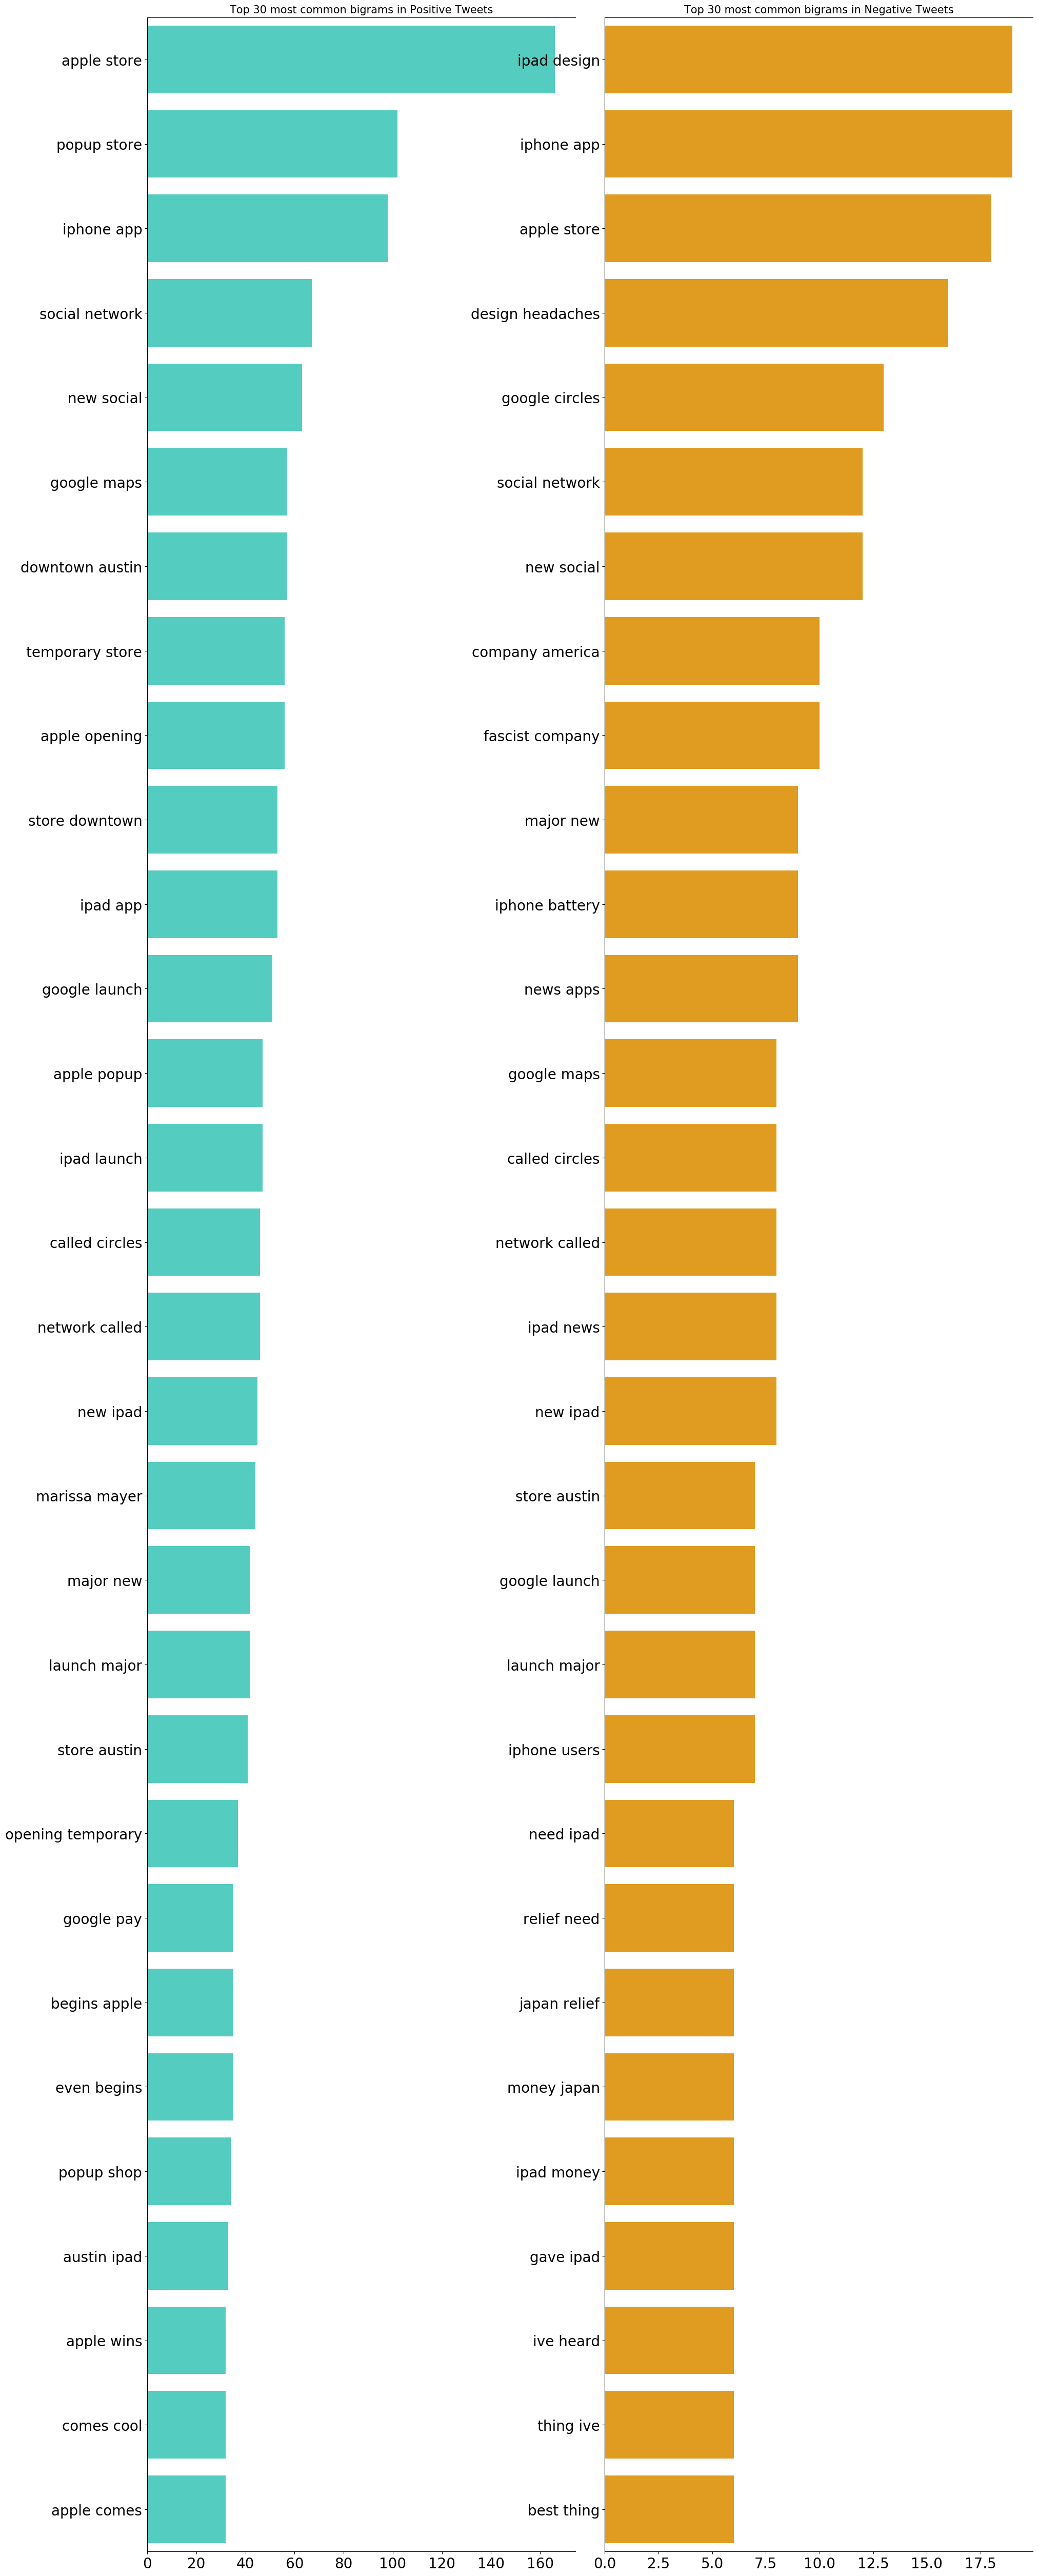

In [172]:
# Plotting bigrams
fig, axes = plt.subplots(ncols=2, figsize=(18, 50), dpi=100)

plt.tight_layout()

sns.barplot(y=positive_bigrams_df[0].values[:30], x=positive_bigrams_df[1].values[:30], ax=axes[0], color='turquoise')
sns.barplot(y=negative_bigrams_df[0].values[:30], x=negative_bigrams_df[1].values[:30], ax=axes[1], color='orange')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=20)
    axes[i].tick_params(axis='y', labelsize=20)

axes[0].set_title(f'Top {30} most common bigrams in Positive Tweets', fontsize=15)
axes[1].set_title(f'Top {30} most common bigrams in Negative Tweets', fontsize=15)

plt.show()

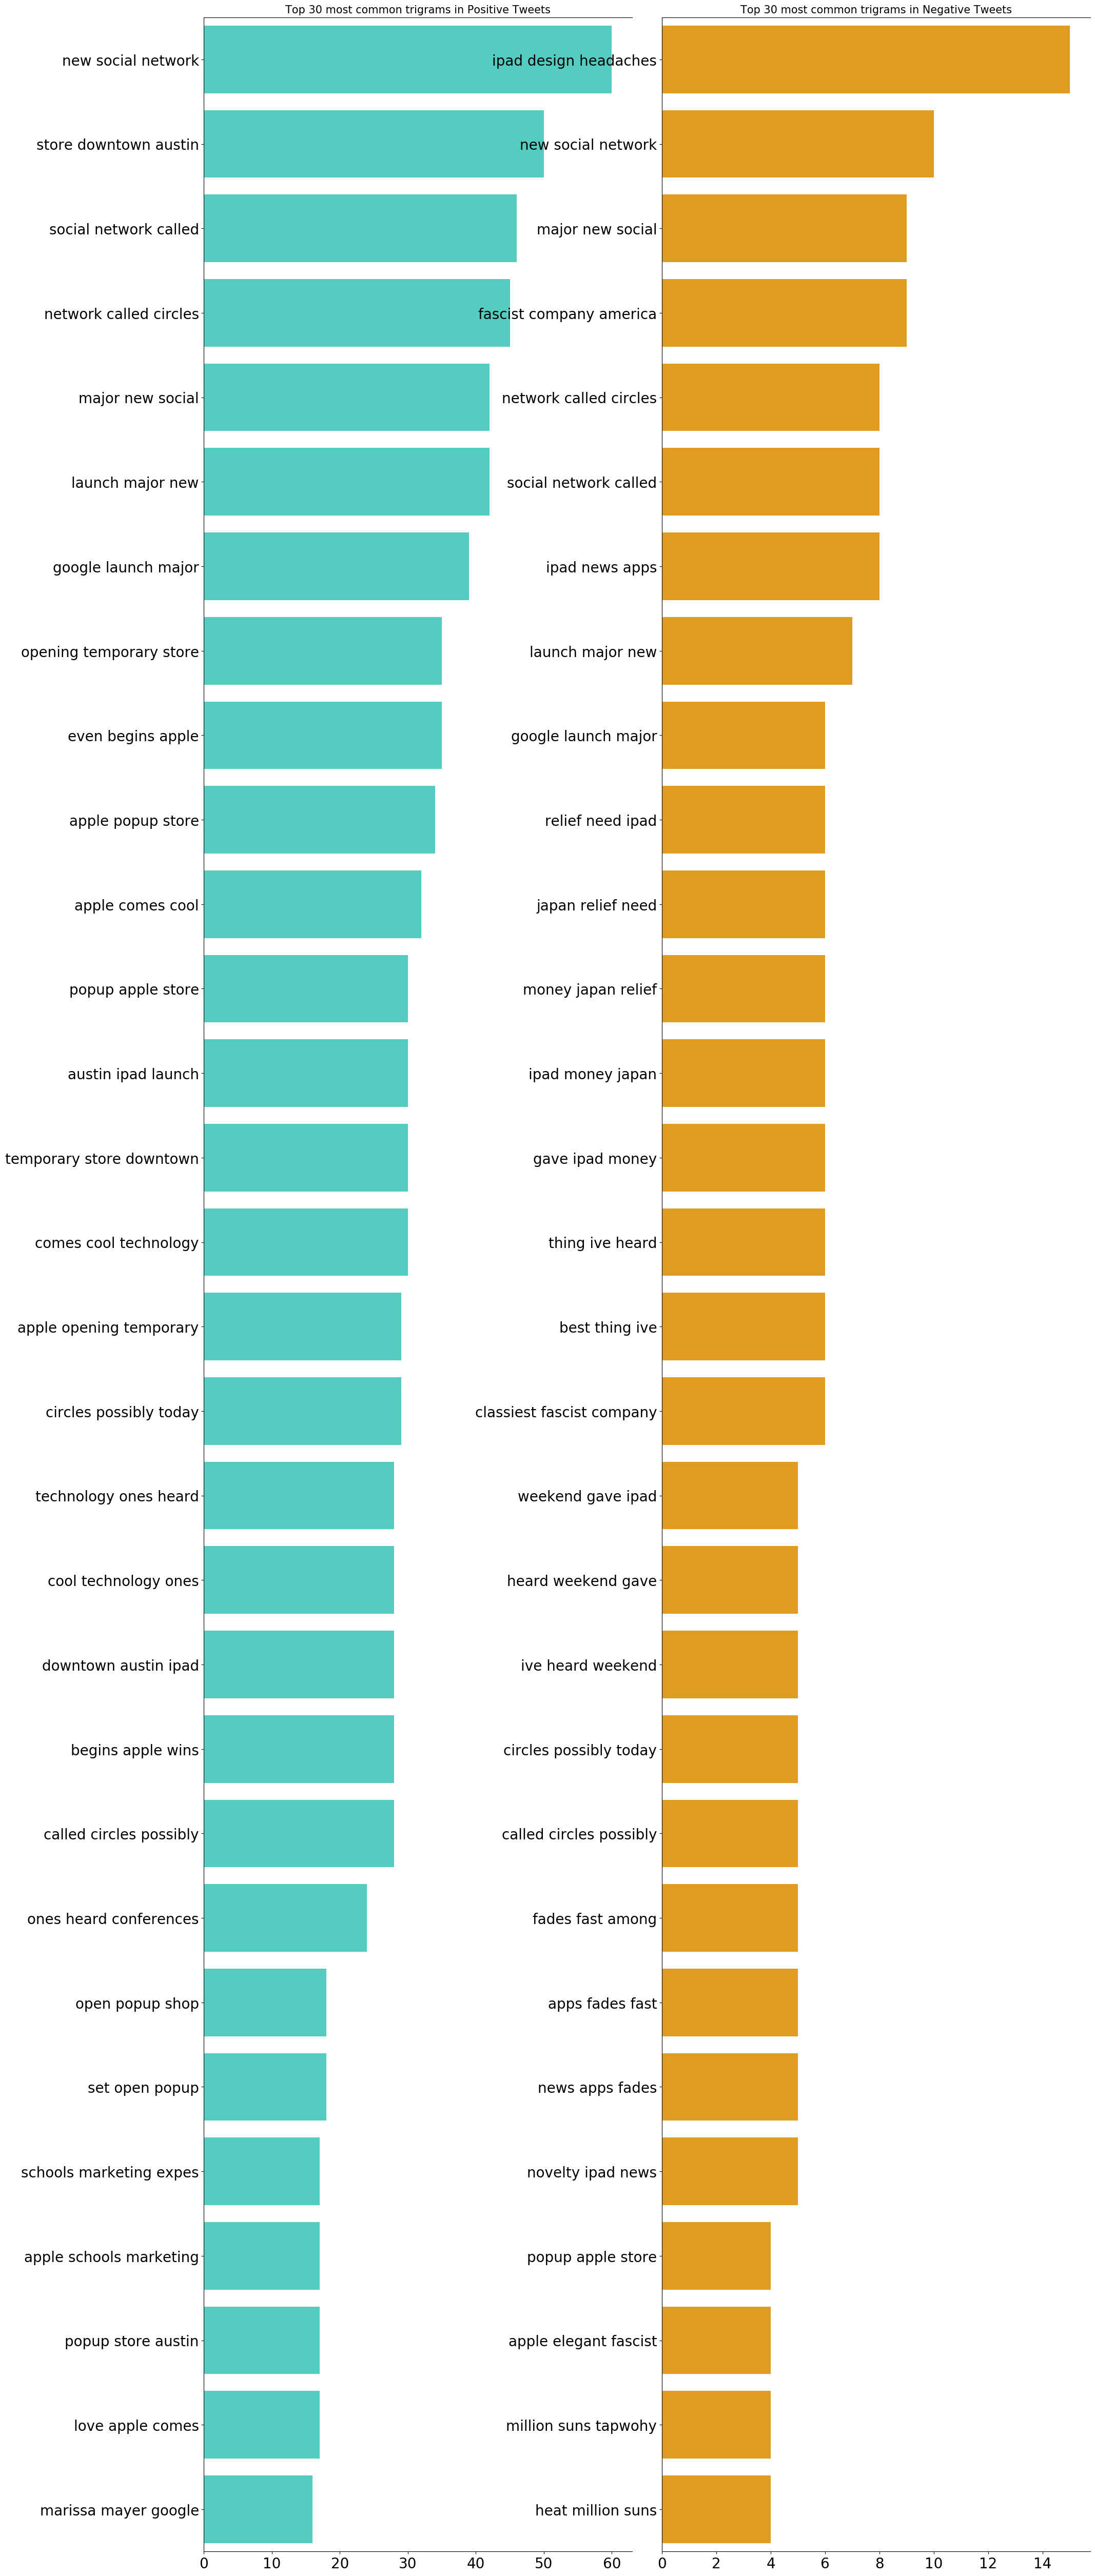

In [173]:
#Plotting trigrams
fig, axes = plt.subplots(ncols=2, figsize=(18, 50), dpi=100)

plt.tight_layout()

sns.barplot(y=positive_trigrams_df[0].values[:30], x=positive_trigrams_df[1].values[:30], ax=axes[0], color='turquoise')
sns.barplot(y=negative_trigrams_df[0].values[:30], x=negative_trigrams_df[1].values[:30], ax=axes[1], color='orange')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=20)
    axes[i].tick_params(axis='y', labelsize=20)

axes[0].set_title(f'Top {30} most common trigrams in Positive Tweets', fontsize=15)
axes[1].set_title(f'Top {30} most common trigrams in Negative Tweets', fontsize=15)

plt.show()

In [176]:
raw_text = [word for word_list in train_data['temp_list'] for word in word_list]

In [177]:
raw_text

['apple',
 'defining',
 'language',
 'touch',
 'different',
 'dialects',
 'becoming',
 'smaller',
 'learning',
 'google',
 'doodles',
 'doodles',
 'light',
 'funny',
 'innovative',
 'exceptions',
 'significant',
 'occasions',
 'googledoodle',
 'one',
 'inyourface',
 'stealing',
 'show',
 'yrs',
 'apple',
 'schools',
 'mkt',
 'expes',
 'iphone',
 'app',
 'pretty',
 'awesome',
 'crash',
 'every',
 'extended',
 'browsing',
 'fuckit',
 'illmakeitwork',
 'line',
 'outside',
 'apple',
 'store',
 'austin',
 'waiting',
 'new',
 'ipad',
 'technews',
 'one',
 'lone',
 'dude',
 'awaits',
 'ipad',
 'appleaas',
 'store',
 'technews',
 'apple',
 'tablets',
 'tech',
 'tips',
 'prince',
 'npr',
 'videos',
 'toy',
 'shopping',
 'zuckerberg',
 'ipad',
 'user',
 'new',
 'ubersocial',
 'iphone',
 'now',
 'app',
 'store',
 'includes',
 'uberguide',
 'sponsored',
 'mashable',
 'free',
 'sampler',
 'itunes',
 'freemusic',
 'think',
 'might',
 'weekend',
 'without',
 'seeing',
 'ipad',
 'case',
 'twice',
 'of

In [178]:
train_data.head()

tweet_id  \
0  1701       
1  1851       
2  2689       
3  4525       
4  3604       

                                                                                                                                    tweet  \
0    #apple defining language of touch with different dialects becoming smaller                                                             
1  Learning ab Google doodles! All doodles should be light, funny & innovative, with exceptions for significant occasions. #GoogleDoodle    
2  one of the most in-your-face ex. of stealing the show in yrs RT @mention "At  Apple schools the mkt experts"  {link}                     
3  This iPhone  app would b pretty awesome if it didn't crash every 10mins during extended browsing. #Fuckit #Illmakeitwork                 
4  Line outside the Apple store in Austin waiting for the new iPad   {link}                                                                 

   sentiment vis_sentiment  word_count  tweet_len  \
0  1          Neutral       12          89          
1  1          Neutral       19          143         
2  2          Positive      22          132         
3  0          Negative      19          125         
4  1          Neutral       14          77          

                                                                                                               cleaned_text  \
0  apple defining language touch with different dialects becoming smaller                                                     
1  learning google doodles all doodles should light funny innovative with exceptions for significant occasions googledoodle   
2  one the most inyourface stealing the show yrs apple schools the mkt expes                                                  
3  this iphone app would pretty awesome did not crash every during extended browsing fuckit illmakeitwork                     
4  line outside the apple store austin waiting for the new ipad                                                               

                                named_entity_1 organizations  org_apple  \
0  []                                           []            1           
1  []                                           []            0           
2  [(one, CARDINAL), (Apple, ORG), (mkt, ORG)]  [Apple, mkt]  1           
3  [(iPhone, EVENT), (Illmakeitwork, PERSON)]   []            1           
4  [(Apple, ORG), (Austin, GPE)]                [Apple]       1           

   org_google  org_uber  org_microsoft  org_facebook  \
0  0           0         0              0              
1  1           0         0              0              
2  0           0         0              0              
3  0           0         0              0              
4  0           0         0              0              

                                                                                                          temp_list  
0  [apple, defining, language, touch, different, dialects, becoming, smaller]                                        
1  [learning, google, doodles, doodles, light, funny, innovative, exceptions, significant, occasions, googledoodle]  
2  [one, inyourface, stealing, show, yrs, apple, schools, mkt, expes]                                                
3  [iphone, app, pretty, awesome, crash, every, extended, browsing, fuckit, illmakeitwork]                           
4  [line, outside, apple, store, austin, waiting, new, ipad]

In [179]:
def words_unique(sentiment,numwords,raw_words):
    '''
    Input:
        sentiment - Sentiment category (ex. 'Neutral');
        numwords - how many specific words do you want to see in the final result; 
        raw_words - list  for item in train_data[train_data.sentiment == sentiment]['temp_list']:
    Output: 
        dataframe giving information about the name of the specific ingredient and how many times it occurs in the chosen cuisine (in descending order based on their counts)..

    '''
    allother = []
    for item in train_data[train_data.sentiment != sentiment]['temp_list']:
        for word in item:
            allother .append(word)
    allother  = list(set(allother ))
    
    specificnonly = [x for x in raw_text if x not in allother]
    
    mycounter = Counter()
    
    for item in train_data[train_data.sentiment == sentiment]['temp_list']:
        for word in item:
            mycounter[word] += 1
    keep = list(specificnonly)
    
    for word in list(mycounter):
        if word not in keep:
            del mycounter[word]
    
    Unique_words = pd.DataFrame(mycounter.most_common(numwords), columns = ['words','count'])
    
    return Unique_words

In [180]:
Unique_Positive= words_unique(2, 100, raw_text)
print("The top 20 unique words in Positive Tweets are:")
Unique_Positive.head(20).style.background_gradient(cmap='Greens')

The top 20 unique words in Positive Tweets are:


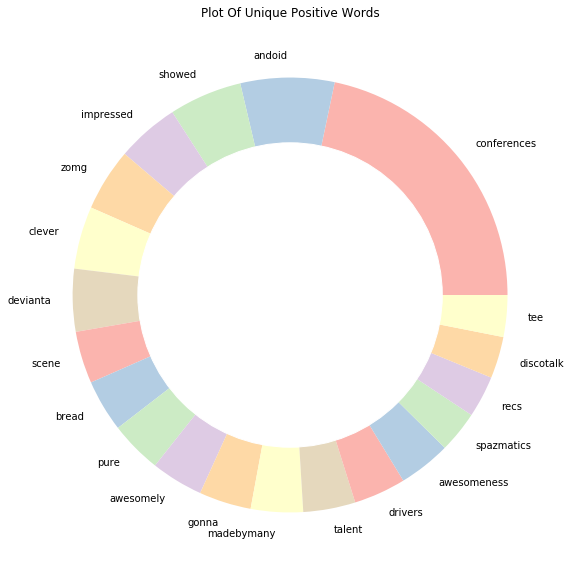

In [188]:
from palettable.colorbrewer.qualitative import Pastel1_7
top_20_positive = Unique_Positive.head(20)
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(top_20_positive['count'], labels=top_20_positive.words, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Plot Of Unique Positive Words')
plt.show()

In [182]:
Unique_Negative = words_unique(0, 100, raw_text)
print("The top 20 unique words in Negative Tweets are:")
Unique_Negative.head(20).style.background_gradient(cmap='Reds')

The top 20 unique words in Negative Tweets are:


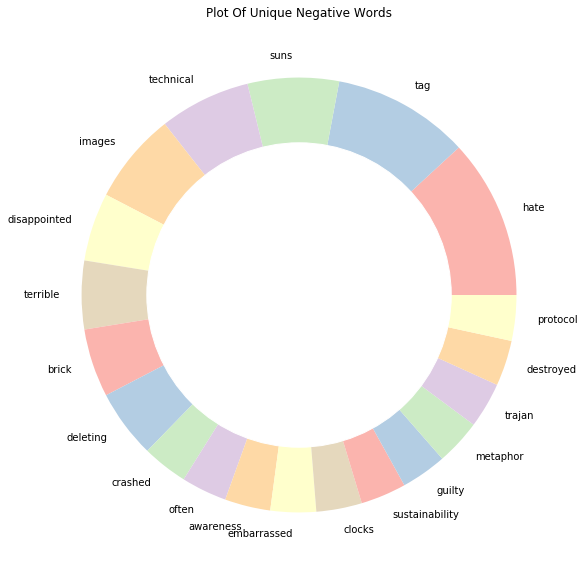

In [189]:
from palettable.colorbrewer.qualitative import Pastel1_7
top_20_negative = Unique_Negative.head(20)
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(top_20_negative['count'], labels=top_20_negative.words, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Plot Of Unique Negative Words')
plt.show()

In [190]:
Unique_Neutral= words_unique(1, 50, raw_text)
print("The top 10 unique words in Neutral Tweets are:")
Unique_Neutral.head(10).style.background_gradient(cmap='Oranges')

The top 10 unique words in Neutral Tweets are:


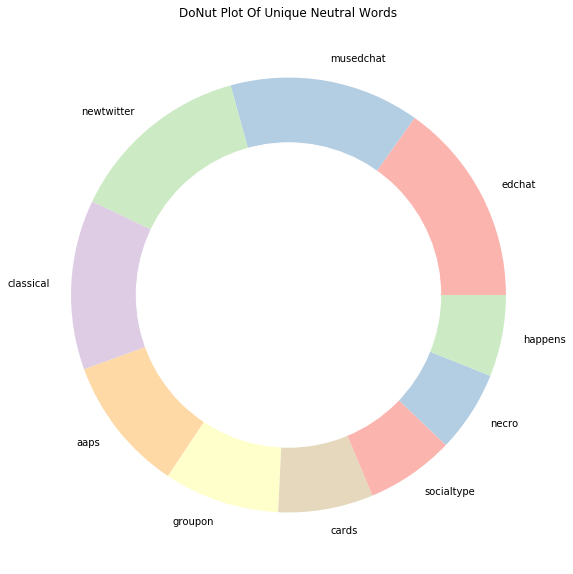

In [191]:
# from palettable.colorbrewer.qualitative import Pastel1_7
top_10_neutral = Unique_Neutral.head(10)
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(top_10_neutral['count'], labels=top_10_neutral.words, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique Neutral Words')
plt.show()

In [198]:
def plot_wordcloud(text, mask, max_words=200, max_font_size=100, figure_size=(15,10), color = 'white',
                   title = None, title_size=40, image_color=False):
#     print(text)
    stopwords = set(STOPWORDS)
    more_stopwords = {"bitlyhmiiga",'scheen','spos', 'needing','filteraa', 'lanzara', 'ningun', 'producto','cst', 'youaare', 'zlf', 'sat','aaps','offersaa' }
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color=color,
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=400, 
                    height=200,
                    mask = mask)
    wordcloud.generate(str(text))
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()

In [200]:
flat_list = []
positive_hash_corpus = ''
for sublist in positive_hashtags:
    for item in sublist:
        flat_list.append(item)
positive_hash_corpus = ' '.join(flat_list)

In [201]:
positive_hash_corpus

'freemusic elevate techenvy apple fb ipad tech lightbox_photos android technology ipad2 lovemusicapi tech apple sxflip gsdm usguys apple seattle social apple bt google google circles socbiz fb augmentedreality minimalistprogramming marissagoogle fxsw apple ipad ipad2 discotalk sloanxsw ipad2 ipad japan ipad ipad art qagb ipad apple winning android google apple ipad2 austin apple theindustryparty google gsdm swsurrogates notpouting apple browserwars apple ipad2 iphone app virtualoffice apple apple ipad2 google lxh xplat doingitwrong itunes apple socialmuse android appcircus dgtltribe openbeta6 logo ipad2 vcards qrcode iphone ipad2 apple technology apple tech newsapps gooddeed winning ncaa discovr google circles social techrockstar saysshewithoutanipad tradeshow bnet biz ipad2 apple ipad googledoodle popplet frood winning ipad2 hangover3 connectedtv ubersocial iphone itunes ipad2 1990style iphone eventseekr app free google circles google winning google circles checkins fh apple spiltbeer

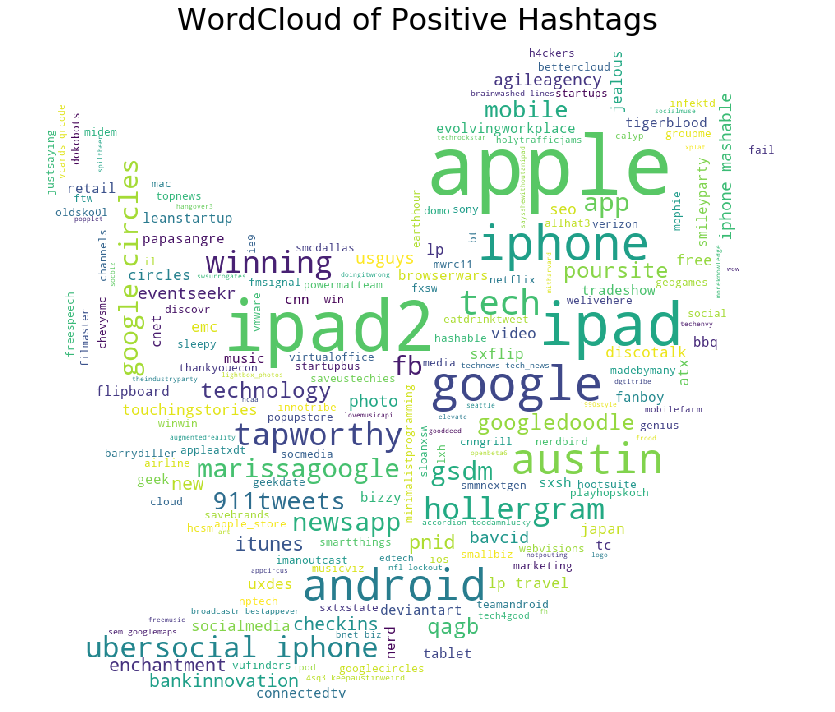

In [202]:
d= '../data/masks-for-wordclouds/'
pos_mask = np.array(Image.open(d+ 'twitter_mask.png'))
plot_wordcloud(positive_hash_corpus,mask=pos_mask,color='white',max_font_size=100,title_size=30,title="WordCloud of Positive Hashtags")

In [203]:
flat_list = []
negative_hash_corpus = ''
for sublist in negative_hashtags:
    for item in sublist:
        flat_list.append(item)
negative_hash_corpus = ' '.join(flat_list)

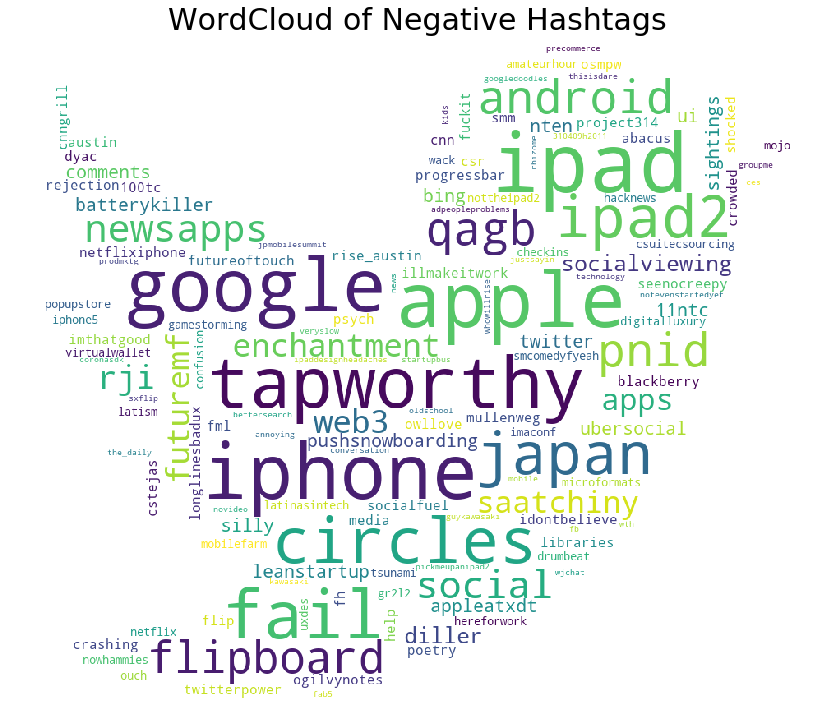

In [204]:
d= '../data/masks-for-wordclouds/'
pos_mask = np.array(Image.open(d+ 'twitter_mask.png'))
plot_wordcloud(negative_hash_corpus,mask=pos_mask,color='white',max_font_size=100,title_size=30,title="WordCloud of Negative Hashtags")

In [205]:
flat_list = []
neutral_hash_corpus = ''
for sublist in neutral_hashtags:
    for item in sublist:
        flat_list.append(item)
neutral_hash_corpus = ' '.join(flat_list)

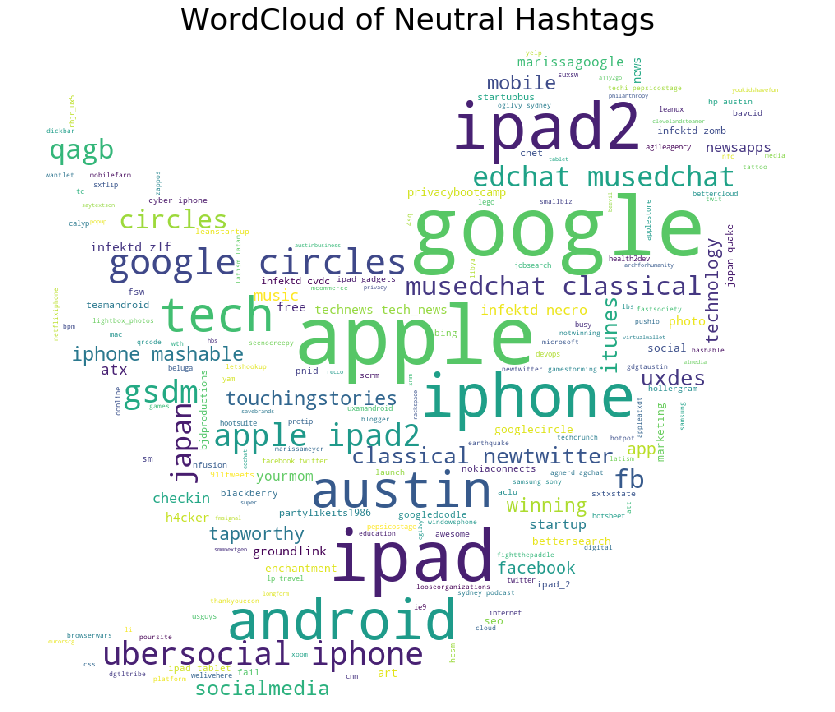

In [206]:
d= '../data/masks-for-wordclouds/'
pos_mask = np.array(Image.open(d+ 'twitter_mask.png'))
plot_wordcloud(neutral_hash_corpus,mask=pos_mask,color='white',max_font_size=100,title_size=30,title="WordCloud of Neutral Hashtags")

In [207]:
common_words = ''
for i in temp.Common_words:
#     print(i)
    common_words += "".join(i)+" "
common_words

'google apple iphone store new austin app circles launch popup social android today network free line called pay now mobile major time one temporary opening possibly going downtown people apps check maps great see open day mayer need marissa know got first come googles want win pop cool news good music love make design tech shop think big search thanks panel best next set use talk around users anyone awesome game last guy rumor download show year japan right really says future even location hey session itunes using coming still booth launching congress week heard twitter ipads digital apples '

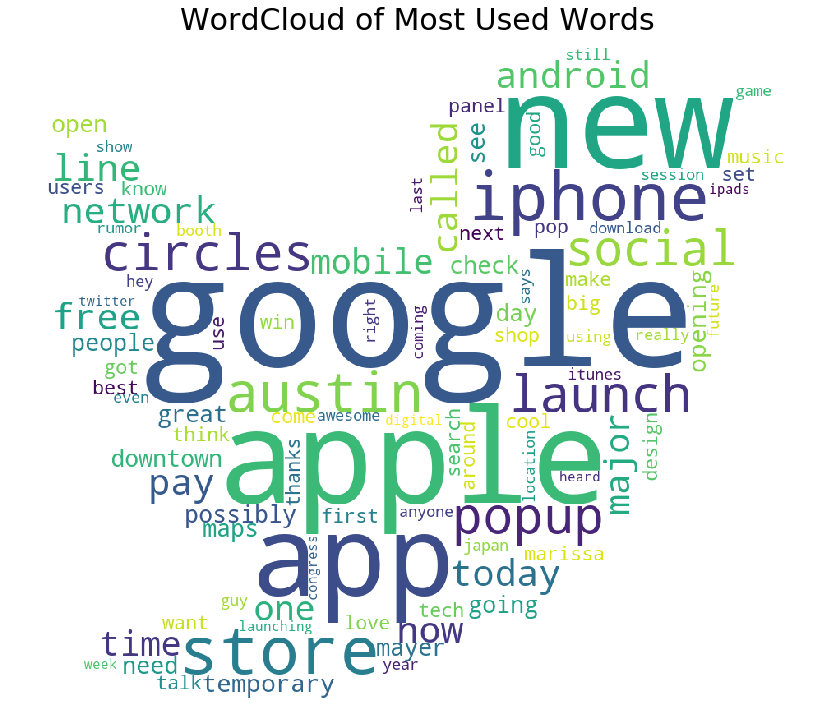

In [208]:
d= '../data/masks-for-wordclouds/'
pos_mask = np.array(Image.open(d+ 'twitter_mask.png'))
plot_wordcloud(common_words,mask=pos_mask,color='white',max_font_size=200,title_size=30,title="WordCloud of Most Used Words")

In [209]:
common_pos_words = ''
for i in temp_positive.Common_words:
#     print(i)
    common_pos_words += "".join(i)+" "
common_pos_words

'ipad apple google iphone store app new austin popup android launch great now social pay free time cool circles line one today love mobile maps day opening temporary got network downtown good awesome apps check see going people even thanks first open called mayer wins want come around major marissa need next really win googles fun use best nice tech technology comes heard users know think begins shop big pop using set news sma case year panel game team ipads marketing apples music wait still video week search design web live ones well possibly yes wow better make ill session '

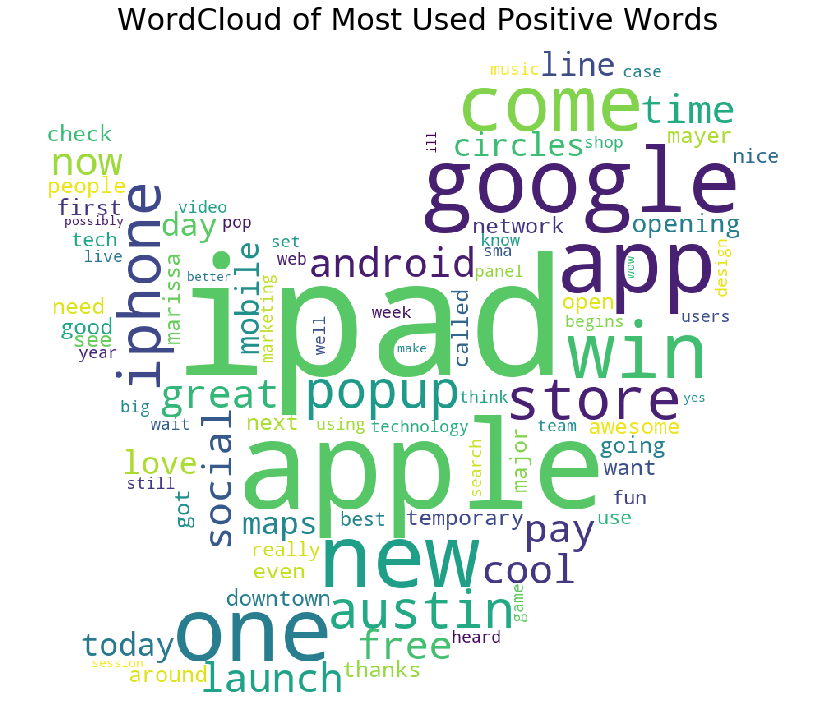

In [210]:
d= '../data/masks-for-wordclouds/'
pos_mask = np.array(Image.open(d+ 'twitter_mask.png'))
plot_wordcloud(common_pos_words,mask=pos_mask,color='white',max_font_size=200,title_size=30,title="WordCloud of Most Used Positive Words")

In [211]:
#Creating a corpus of unique
positive_words = ''
for i in Unique_Positive.words:
#     print(i)
    positive_words += "".join(i)+" "
positive_words

'conferences andoid showed impressed zomg clever devianta scene bread pure awesomely gonna madebymany talent drivers awesomeness spazmatics recs discotalk tee incl revenue exciting woo principles field held routearound filming prize fri semantic museums talented jump hundred thrilled checked enterprise installed alternate build fixing nfl bajillions grooving giddy suspense madness moma law ears continues thin moonbot studios louisiana sadly target mapquest developed emotional hooray hoo timely intelligent sighting professionals walma airpos registers googlesponsored fogo chaao goodness pictures sneakers photoes drafthouse recommends forbes roof etchasketch catching paner coincide throwing impromptu agents informal unscientific observation muro expecting leading kit traded winwin heatmap charm '

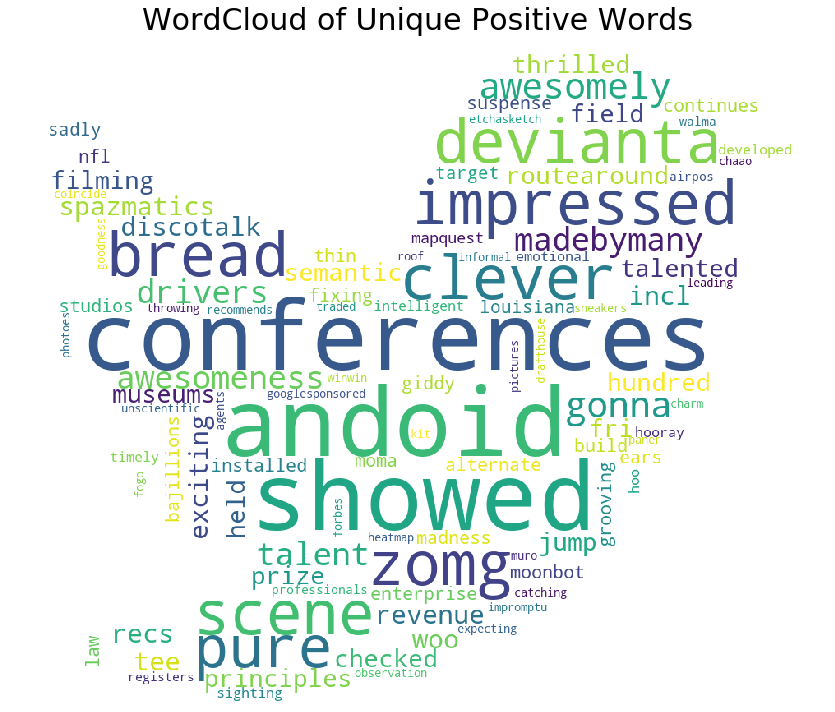

In [212]:
d= '../data/masks-for-wordclouds/'
pos_mask = np.array(Image.open(d+ 'twitter_mask.png'))
plot_wordcloud(positive_words,mask=pos_mask,color='white',max_font_size=200,title_size=30,title="WordCloud of Unique Positive Words")

In [213]:
common_neg_words = ''
for i in temp_negative.Common_words:
#     print(i)
    common_neg_words += "".join(i)+" "
common_neg_words

'iphone google apple app store new circles design social apps austin need people android today launch headaches fail think time says line see day users battery now network popup ive news really one back yet good fascist company america money major much talk already wait long take called instead tapwohy thing many years first product content looks phone going coming diller may mayer japan twitter fast way made guy room blackberry everyone gave another getting last know weekend best maps every apples nothing well better bing pay feel someone seems still taking use data might hate button morning heard '

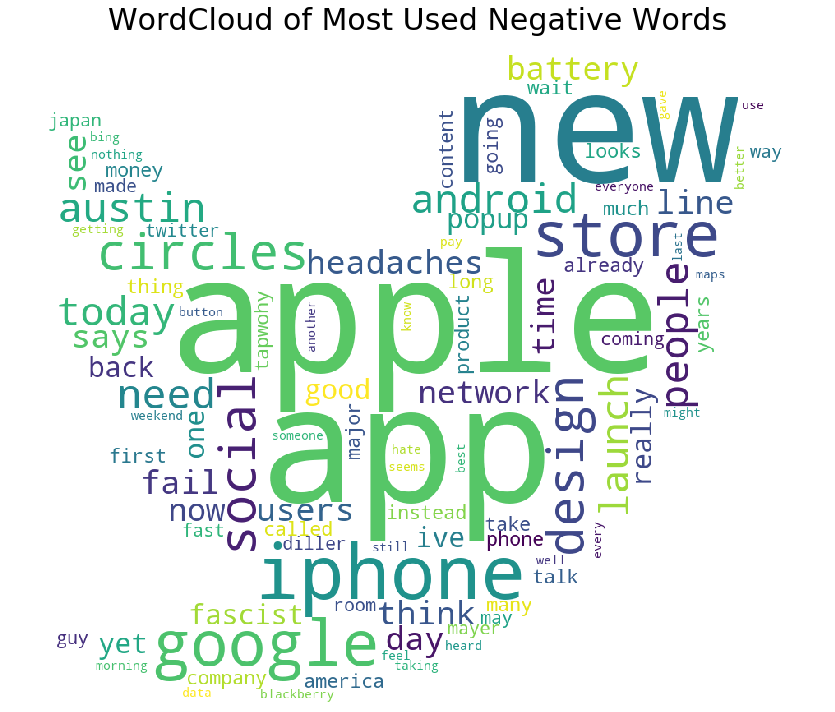

In [214]:
d= '../data/masks-for-wordclouds/'
pos_mask = np.array(Image.open(d+ 'twitter_mask.png'))
plot_wordcloud(common_neg_words,mask=pos_mask,color='white',max_font_size=200,title_size=30,title="WordCloud of Most Used Negative Words")

In [215]:
#Creating a corpus of unique
negative_words = ''
for i in Unique_Negative.words:
#     print(i)
    negative_words += "".join(i)+" "
negative_words

'hate tag suns technical images disappointed terrible brick deleting crashed often awareness embarrassed clocks sustainability guilty metaphor trajan destroyed protocol rji saatchiny disagree abacus nobody socialviewing error fuck malady elbow approaches noticed dst crashy horrible pushsnowboarding hubby kyping patch batterykiller write algorithm grr human journalsim informed populous incapable disruptive comments introduces fair cluttering handset explaining realistic panned trumping rightfully peter improvement forgotten faulty ooing ahing lord voex smugness unbearable june strength cake sightings randy downside mocked glowinthedark shell deadly tweetdeck unstable nten trashy restraunts crash fuckit illmakeitwork riseaustin stations ftp cloudapp psych acerbic cynical dumped twitterpower imthatgood youve existent owllove '

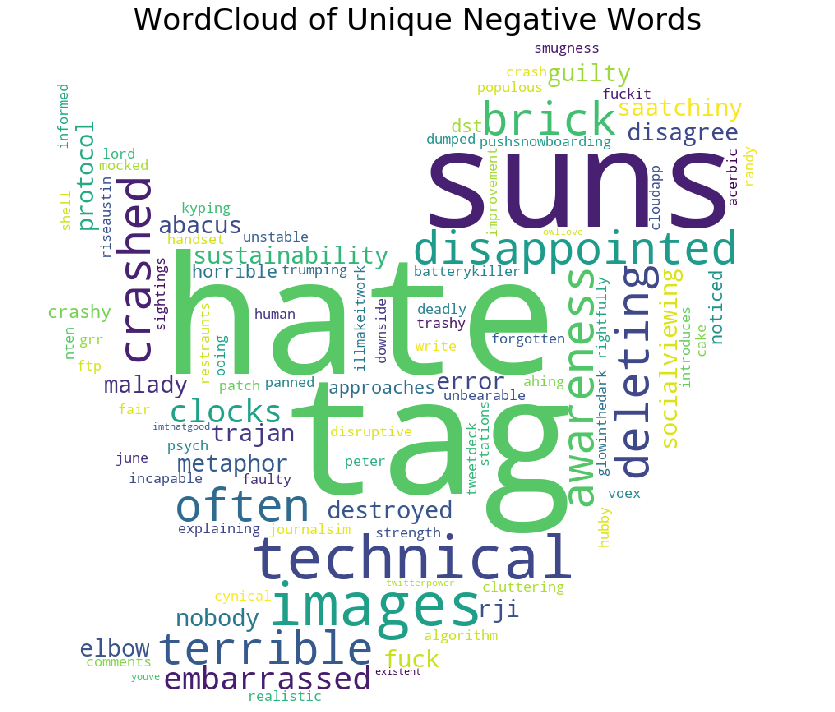

In [216]:
d= '../data/masks-for-wordclouds/'
pos_mask = np.array(Image.open(d+ 'twitter_mask.png'))
plot_wordcloud(negative_words,mask=pos_mask,color='white',max_font_size=200,title_size=30,title="WordCloud of Unique Negative Words")

In [217]:
common_neu_words = ''
for i in temp_neutral.Common_words:
#     print(i)
    common_neu_words += "".join(i)+" "
common_neu_words

'apple ipad store iphone new austin circles social launch today popup app network android called free line mobile major pay now possibly temporary opening going open downtown one check mayer time know marissa people see googles need music apps pop win maps come want day make anyone first news shop launching tech search talk got set download panel show guy location big japan rumor itunes game last future facebook designing next congress think design best twitter products says right great digital use please booth hey year session blackberry around gsdm users good find thanks coming week tonight still video '

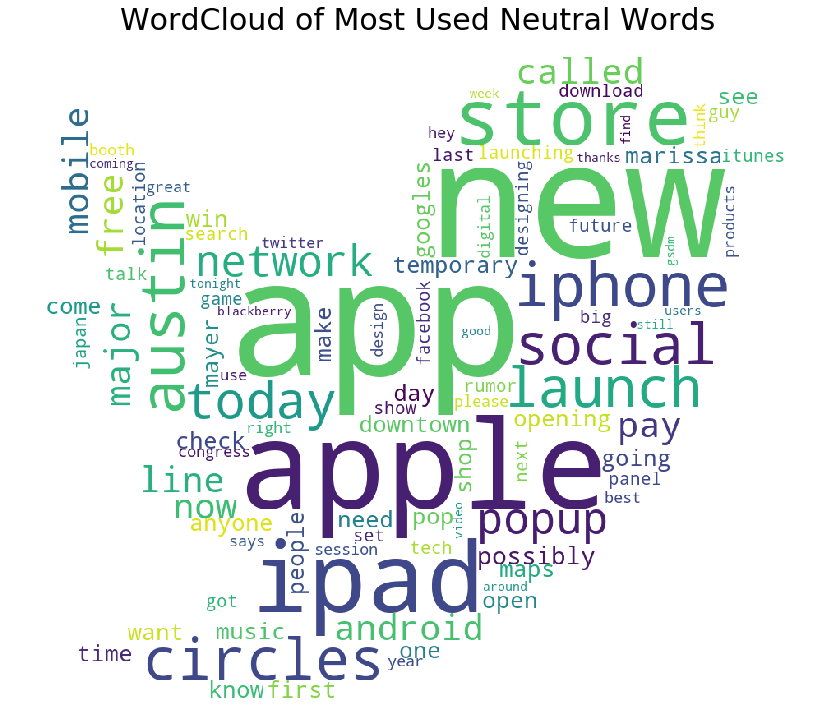

In [218]:
d= '../data/masks-for-wordclouds/'
pos_mask = np.array(Image.open(d+ 'twitter_mask.png'))
plot_wordcloud(common_neu_words,mask=pos_mask,color='white',max_font_size=200,title_size=30,title="WordCloud of Most Used Neutral Words")

In [219]:
#Creating a corpus of common_words
neutral_words = ''
for i in Unique_Neutral.words:
#     print(i)
    neutral_words += "".join(i)+" "
neutral_words

'edchat musedchat newtwitter classical aaps groupon cards socialtype necro happens consider yourmom cst youaare zlf sat john reminder gearing privacybootcamp tips photography acoustic closes playlist forming lead meyer hiring cameron sinclair spearheads guardian surprised announcement steps cvdc elusive pepsicostage spreadsheet attendance longest young aacheckin offersaa click splash zomb currently according '

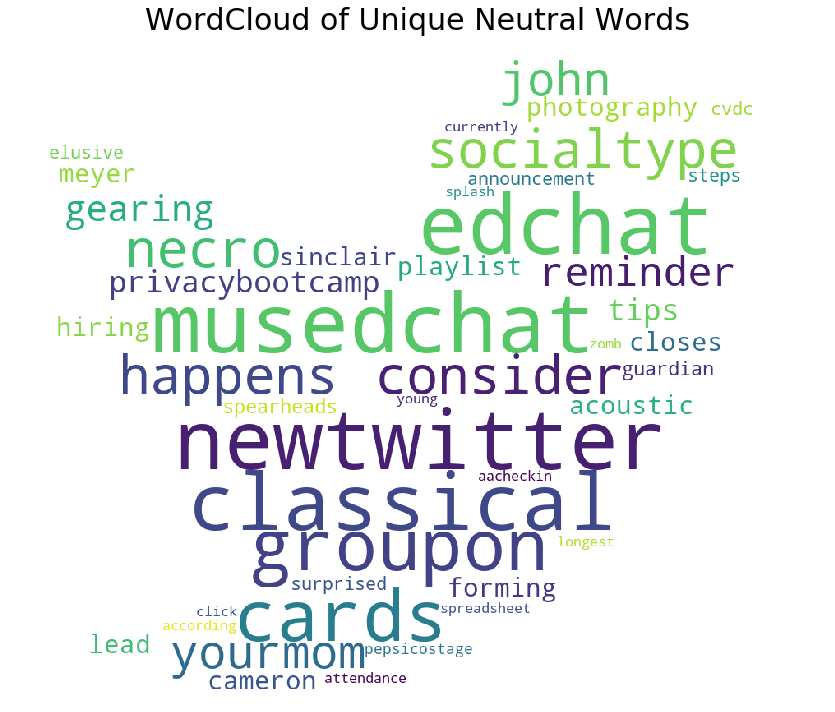

In [220]:
d= '../data/masks-for-wordclouds/'
pos_mask = np.array(Image.open(d+ 'twitter_mask.png'))
plot_wordcloud(neutral_words,mask=pos_mask,color='white',max_font_size=100,title_size=30,title="WordCloud of Unique Neutral Words")

In [ ]:
train_data = train_data[train_data['tweet_id'] != 5025]

In [573]:
train_data.shape

(7147, 17)

In [59]:
from gensim.utils import simple_preprocess
# Tokenize the text column to get the new column 'tokenized_text'
train_data['tokenized_text'] = [simple_preprocess(line, deacc=True) for line in train_data['tweet']] 
print(train_data['tokenized_text'].head(10))

0    [sxswnui, sxsw, apple, defining, language, of, touch, with, different, dialects, becoming, smaller]                                                   
1    [learning, ab, google, doodles, all, doodles, should, be, light, funny, innovative, with, exceptions, for, significant, occasions, googledoodle, sxsw]
2    [one, of, the, most, in, your, face, ex, of, stealing, the, show, in, yrs, rt, mention, at, sxsw, apple, schools, the, mkt, experts, link]            
3    [this, iphone, sxsw, app, would, pretty, awesome, if, it, didn, crash, every, mins, during, extended, browsing, fuckit, illmakeitwork]                
4    [line, outside, the, apple, store, in, austin, waiting, for, the, new, ipad, sxsw, link]                                                              
5    [technews, one, lone, dude, awaits, ipad, at, apple, uªs, sxsw, store, link, tech_news, apple, ipad_, sxsw, tablets, tech]                            
6    [sxsw, tips, prince, npr, videos, toy, shopping, with, zuck

In [80]:
test_data['tokenized_text'] = [simple_preprocess(line,deacc=True) for line in test_data['tweet']]
print(test_data['tokenized_text'].head(10))

0    [audience, what, prototyping, tools, do, you, use, sketchbooks, sharpie, pens, photoshop, balsamic, google, docs, axsure, etc, myprototype, sxsw]       
1    [at, sxsw, send, your, best, photos, videos, to, link, cnn, ireport, photography, sxsw, cyber, iphone]                                                  
2    [mention, and, here, pic, of, you, winning, your, ipad, unsix, sxsw, cc, mention, mention, link, cont, link]                                            
3    [google, marissa, mayer, mobile, phone, as, cursor, of, physical, location, new, version, of, map, fast, and, more, real, life, like, sxsw]             
4    [sxsw, google, maps, is, even, cooler, than, thought]                                                                                                   
5    [rt, mention, in, front, of, mention, popup, store, at, sxsw, last, night, link]                                                                        
6    [rt, mention, in, my, next, life, coming, back,

In [71]:
from gensim.parsing.porter import PorterStemmer
porter_stemmer = PorterStemmer()
# Get the stemmed_tokens
train_data['stemmed_tokens'] = [[porter_stemmer.stem(word) for word in tokens] for tokens in train_data['tokenized_text'] ]
train_data['stemmed_tokens'].head(10)

test_data['stemmed_tokens'] = [[porter_stemmer.stem(word) for word in tokens] for tokens in test_data['tokenized_text']]
test_data['stemmed_tokens'].head(10)

0    [audienc, what, prototyp, tool, you, us, pen, photoshop, balsam, googl, doc, axsur, etc, myprototyp]              
1    [send, your, best, photo, video, cnn, irepo, photographi, cyber, iphon]                                           
2    [and, here, pic, you, win, your, ipad, unsix, cont]                                                               
3    [googl, marissa, mayer, mobil, phone, cursor, physic, locat, new, version, map, fast, and, more, real, life, like]
4    [googl, map, even, cooler, than, thought]                                                                         
5    [front, popup, store, last, night]                                                                                
6    [next, life, come, back, ipad, women, cannot, keep, their, hand, off, thi, thing]                                 
7    [googl, celebr, dai, style]                                                                                       
8    [hmm, bit, weird, that, not, tend, 

In [ ]:
# import packages
from nltk.corpus import stopwords
import nltk
from string import punctuation
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize

# stop_words = list(set(stopwords.words('english')))
# train_data['tokenized_data'] = train_data['cleaned_text'].apply(lambda row: word_tokenize(row))
# test_data['tokenized_data'] = test_data['cleaned_text'].apply(lambda row: word_tokenize(row))


# # stopword removal
# train_data['tokenized_data'] = train_data['tokenized_data'].apply(lambda row: [word for word in row if word not in stop_words])
# # train_data['tokenized_data'] = train_data['tokenized_data'].apply(lambda row: [])
# test_data['tokenized_data'] = test_data['tokenized_data'].apply(lambda row: [word for word in row if word not in stop_words])

# wordnet_lemmatizer = WordNetLemmatizer()

porter = PorterStemmer()

# stemming words
# stemmer = PorterStemmer()
corpus = []
train_data['tokenized_text'] = train_data['tokenized_text'].apply(lambda x:[porter.stem(i) for i in x])
train_data['tokenized_text'] = train_data['tokenized_text'].apply(lambda x:' '.join(x))
for i in train_data.tokenized_text:
    corpus.append(i)
print(corpus)

In [81]:
test_data['tokenized_text'] = test_data['tokenized_text'].apply(lambda x:[porter.stem(i) for i in x])
test_data['tokenized_text'] = test_data['tokenized_text'].apply(lambda x:' '.join(x))

# train_data.head(20)

In [82]:
train_data.shape

(7148, 7)

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
# cv = CountVectorizer(max_features=1500)


# # Independent variable
# X = (cv.fit_transform(corpus)).toarray()


# # dependent variable
# y = train_data['sentiment']

# # Counts
# count = y.value_counts()
# print(count)

# # Split the dataset
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [83]:
train_data.isnull().sum()

tweet_id          0
tweet             0
sentiment         0
vis_sentiment     0
tweet_len         0
word_count        0
tokenized_text    0
dtype: int64

In [ ]:
train_data.to_csv('../data/traindata_check.csv',index=False)

In [ ]:
traindata_check = pd.read_csv('../data/traindata_check.csv')

In [ ]:
traindata_check.isnull().sum()

In [ ]:
train_data.shape

In [588]:
from textblob import TextBlob
# Creating Polarity Column using TextBlob
tb_polarity = []
for sentence in train_data['tokenized_data']:
    temp = TextBlob(sentence)
    tb_polarity.append(temp.sentiment[0])
train_data['polarity'] = tb_polarity

test_polarity =[]
for sentence in test_data['tokenized_data']:
    temp = TextBlob(sentence)
    test_polarity.append(temp.sentiment[0])
# print(tb_polarity)
test_data['polarity'] = test_polarity

In [589]:
train_data['polarity'].isnull().sum()

0

In [ ]:
test_data.head()

In [ ]:
test_data.shape

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tweets_train = tfidf_vectorizer.fit_transform(train_data['tokenized_text'])

In [84]:
tweets_test = tfidf_vectorizer.transform(test_data['tokenized_text'])

In [66]:
X=tweets_train.toarray()
# X = pd.DataFrame(X)

# X.index = train_data.index

# X['polarity'] = train_data['polarity']
# train_data['sentiment']

In [67]:
# import libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score



# ratio to split into training and test set
ratio = int(len(train_data)*0.75)

# logistic regression model
logreg = LogisticRegression(random_state=2) 

# Code starts here

# TF-IDF feature matrix
# tfidf_vedtorizer = TfidfVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')

# # fit and transform tweets
# tweets = tfidf_vedtorizer.fit_transform(train_data['tokenized_data'])


# split into train and test
X_train,X_test,y_train,y_test = train_test_split(X,train_data.sentiment, test_size=0.25,random_state=22)
# X_train = tweets[:ratio,:]
# X_test = tweets[ratio:,:]
# y_train = train_data['sentiment'].iloc[:ratio]
# y_test = train_data['sentiment'].iloc[ratio:]

# fit on training data
logreg.fit(X_train,y_train)

# make predictions
prediction = logreg.predict(X_test)
# prediction_int = (prediction[:,1] >= 0.3).astype(int)

# print out accuracy
f1 = f1_score(y_test,prediction,average='weighted')
f1

0.6562288450247664

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

# Instantiate calssifier
rf = RandomForestClassifier(random_state=2)

# fit model on training data
rf.fit(X_train,y_train)

# predict on test data
y_pred = rf.predict(X_test)

# calculate the accuracy score
score = f1_score(y_test,y_pred,average='weighted')

# calculate the precision
# precision = precision_score(y_test,y_pred)

# display 'score' and 'precision'

print(score)
# print(precision


0.64404620790222


Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   50.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 10.9min finished


In [629]:
y_pred_rf_grid = gridF.predict(X_test)
score_grid_rf = f1_score(y_test,y_pred_rf_grid,average='weighted')


In [630]:
score_grid_rf

0.6240920632484956

In [69]:
# import packages
from imblearn.over_sampling import SMOTE

# Instantiate smote
smote = SMOTE(random_state=9)

# fit_sample onm training data
X_smote,y_smote = smote.fit_sample(X_train,y_train)

# fit modelk on training data
rf.fit(X_smote,y_smote)

# predict on test data
y_pred = rf.predict(X_test)

# calculate the accuracy score
score = f1_score(y_test,y_pred,average='weighted')

# calculate the precision
# precision = precision_score(y_test,y_pred)

# display precision and score
print(score)
# print(precision)

Using TensorFlow backend.


0.6619609648912955


In [ ]:
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(rf, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
gridF.fit(X_smote, y_smote)
print(gridF.best_params_)
print(gridF.best_estimator_)

rf_grid_predict = gridF.predict(X_test)
rf_grid_score = f1_score(y_test,rf_grid_predict)
print(rf_grid_score)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 
# svm = LinearSVC(random_state = 42)
# svm.fit(X_train, y_train)
# y_pred = svm.predict(X_test)
# score = f1_score(y_test,y_pred,average='weighted')
# print(score)

param_grid = {'C': [0.1, 0.1,1], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(
    SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_smote, y_smote) 

print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 


grid_predictions = grid.predict(X_test) 
  
# print classification report 
print(f1_score(y_test, grid_predictions,average='weighted')) 


In [73]:
svc_model = SVC(C=1, gamma = 1, kernel = 'rbf')
svc_model.fit(X_train,y_train)
score_svc  = f1_score(y_test,svc_model.predict(X_test),average='weighted')
print(score_svc)

0.6538855451031256


In [74]:
svc_model_smote = SVC(C=1, gamma = 1, kernel = 'rbf')
svc_model_smote.fit(X_smote,y_smote)
score_svc  = f1_score(y_test,svc_model_smote.predict(X_test),average='weighted')
print(score_svc)

0.6714605094559534


### Test Data Modelling 

In [87]:
y_train = train_data['sentiment']

In [88]:
y = tweets_test.toarray()

In [ ]:
# y= pd.DataFrame(y)

In [89]:
ID = test_data['tweet_id']

In [ ]:
# y.index.equals(test_data.index)
# y.index.intersection(test_data.index).empty 

In [ ]:
# y['polarity'] = test_data['polarity']

In [91]:
smote = SMOTE(random_state=9)
X_smote,y_smote = smote.fit_sample(X,y_train)
svc_model = SVC(C=1, gamma = 1, kernel = 'rbf')
svc_model.fit(X_smote,y_smote)
y_pred_svc = svc_model.predict(y)

In [92]:
y_pred_svc

array([1, 1, 1, ..., 1, 2, 1])

In [ ]:
smote = SMOTE(random_state=9)

# fit_sample onm training data
X_smote,y_smote = smote.fit_sample(X,y_train)

# Instantiate calssifier
rf_test = RandomForestClassifier(random_state=2)

# fit model on training data
rf.fit(X_smote,y_smote)

#
predict on test data
y_pred_rf = rf.predict(y)

# calculate the accuracy score
# score = f1_score(y_test,y_pred,average='micro')

# calculate the precision
# precision = precision_score(y_test,y_pred)

# display 'score' and 'precision'

# print(score)
# print(precision


In [ ]:
y_pred_rf

In [ ]:
y_pred_rf.shape

In [93]:
prediction = pd.DataFrame(y_pred_svc,columns=['sentiment'])

In [94]:
submission_trial_10 = pd.concat([ID,prediction['sentiment']],1)
submission_trial_10.to_csv('../data/submission_trial_10.csv',index=False)

In [95]:
submission_file = pd.read_csv('../data/submission_trial_10.csv')
submission_file.head()

tweet_id  sentiment
0  7506      1        
1  7992      1        
2  247       1        
3  7688      2        
4  3294      2